#### **Логистическая регрессия (Logistic Regression)**

**Зачем вообще нужна логистическая регрессия?**

**Линейная регрессия, как мы уже знаем, предназначена для предсказания *непрерывных* значений.**  Например, цены домов, температуры, доходы и т.д.  Выход линейной регрессии - это **любое число** на числовой прямой (теоретически, от минус бесконечности до плюс бесконечности).

**Но в задачах классификации нам нужно предсказывать *категории* или *классы*.**  Например:

*   **Бинарная классификация (два класса):**
    *   Спам/не спам (для email).
    *   Болен/здоров (в медицине).
    *   Кликнет/не кликнет (на рекламу).
    *   0 или 1.
    *   Да/Нет.
    *   Положительный/Отрицательный.
*   **Мультиклассовая классификация (много классов):**
    *   Распознавание цифр (0, 1, 2, ..., 9).
    *   Классификация изображений (кошка, собака, птица, ...).
    *   Типы новостей (спорт, политика, экономика, ...).

**Проблема использования обычной линейной регрессии для классификации:**

Если мы попытаемся использовать линейную регрессию для задачи бинарной классификации (например, спам/не спам, где спам = 1, не спам = 0), то **выход линейной регрессии может быть любым числом, в том числе и отрицательным, или больше 1.**  **Но нам нужно получить вероятность принадлежности к классу "1", а вероятность должна быть в диапазоне от 0 до 1!**

**Линейная регрессия не "умеет" выдавать вероятности, и ее выход не ограничен диапазоном [0, 1].**  Поэтому для задач классификации нужна другая модель - **логистическая регрессия.**

**Логистическая регрессия - это, по сути, "гибрид" линейной регрессии и специальной функции, которая "сжимает" выход линейной регрессии в диапазон [0, 1], превращая его в вероятность.**

**Эта специальная функция называется Сигмоидальная функция (Sigmoid function) или Логистическая функция (Logistic function).**
  
**Как работает логистическая регрессия:**

1.  Вычисляем **линейную комбинацию признаков**, как в обычной линейной регрессии:  `z = Xw + b`.
2.  Пропускаем полученное значение `z` через **сигмоидальную функцию**:  `ŷ = σ(z) = 1 / (1 + e^(-z))`.
3.  **Выход `ŷ` логистической регрессии - это вероятность принадлежности к классу "1" (или положительному классу).**  Значение `ŷ` всегда находится в диапазоне [0, 1].

**Для задачи бинарной классификации, обычно устанавливают порог (threshold) для принятия решения, например, 0.5:**

*   Если `ŷ ≥ 0.5`, то модель предсказывает **класс "1"**.
*   Если `ŷ < 0.5`, то модель предсказывает **класс "0"**.

**Таким образом, логистическая регрессия - это линейная модель для классификации, которая использует сигмоидальную функцию, чтобы "сжать" выход линейной комбинации признаков в вероятность принадлежности к одному из классов.**

**Сигмоидальная функция - это "сердце" логистической регрессии.**  Именно она позволяет нам решать задачи классификации с помощью линейной модели.

**1. Формула Сигмоидальной функции (повторение):**

`σ(z) = 1 / (1 + e^(-z))`

Где:

*   `σ(z)` - сигмоидальная функция от аргумента `z`.
*   `z` - любое вещественное число (выход линейной регрессии `Xw + b`).
*   `e` - основание натурального логарифма (примерно 2.71828).

**2. Свойства Сигмоидальной функции:**
*   **Свойство сигмоиды:**  **Сигмоидальная функция "сжимает" любое входное значение `z` (от -∞ до +∞) в выходное значение в диапазоне [0, 1].**  Именно это свойство нам и нужно, чтобы превратить выход линейной регрессии в вероятность!
*   **Диапазон значений: [0, 1].**  Сигмоидальная функция **ограничена** сверху значением 1 и снизу значением 0.  **Выход сигмоиды всегда находится в диапазоне от 0 до 1, что идеально подходит для представления вероятностей.**

*   **S-образная форма (график):**  График сигмоиды имеет характерную **S-образную форму**.
    *   В центре (при `z = 0`) сигмоида **равна 0.5**.
    *   При больших положительных значениях `z`, сигмоида **стремится к 1**.
    *   При больших отрицательных значениях `z`, сигмоида **стремится к 0**.
    *   **Резкий переход в окрестности `z = 0`:**  Небольшие изменения в `z` вблизи нуля приводят к заметным изменениям в значении сигмоиды.

*   **Монотонно возрастающая:**  Сигмоидальная функция **всегда возрастает** с увеличением `z`.  Чем больше `z`, тем больше значение сигмоиды (тем выше вероятность).

*   **Дифференцируемая:**  Сигмоидальная функция **дифференцируема на всем протяжении своей области определения.**  Это очень важное свойство для алгоритмов оптимизации, таких как градиентный спуск, который мы будем использовать для обучения логистической регрессии.  **Производная сигмоиды выражается очень просто через саму сигмоиду:**

    `σ'(z) = σ(z) * (1 - σ(z))`

    Это свойство упрощает вычисление градиентов при обучении.

**3. Визуализация Сигмоидальной функции:**

Давай построим график сигмоидальной функции с помощью Python, чтобы увидеть ее S-образную форму и диапазон значений [0, 1].

*   **График S-образной кривой.**  Это и есть график сигмоидальной функции.
*   **Ось X - значения `z` (от -10 до +10).**
*   **Ось Y - значения `σ(z)` (от 0 до 1).**  Видно, что значения сигмоиды всегда находятся в диапазоне [0, 1].
*   **В районе `z = 0` - резкий подъем кривой.**
*   **При больших положительных `z` кривая приближается к 1, но не достигает ее.**
*   **При больших отрицательных `z` кривая приближается к 0, но не достигает ее.**

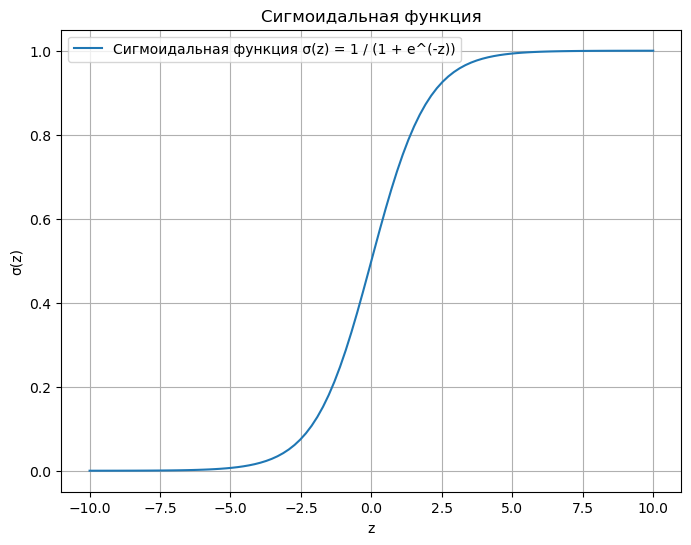

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# --- Сигмоидальная функция ---
def sigmoid(z):
  """
  Сигмоидальная функция.

  Аргументы:
    z: np.array - массив чисел.

  Возвращает:
    sigmoid_z: np.array - массив значений сигмоидальной функции для каждого элемента z.
  """
  return 1 / (1 + np.exp(-z))

# Генерируем значения z в диапазоне от -10 до +10
z_values = np.linspace(-10, 10, 100) # 100 точек от -10 до 10
sigmoid_values = sigmoid(z_values) # Вычисляем значения сигмоиды для z_values

# Строим график сигмоидальной функции
plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label="Сигмоидальная функция σ(z) = 1 / (1 + e^(-z))")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Сигмоидальная функция")
plt.grid(True)
plt.legend()
plt.show()

Теперь нам нужно разобраться с **функцией ошибки для логистической регрессии.**  Как мы помним, для линейной регрессии мы использовали **Среднеквадратичную ошибку (MSE).**  Но для классификации, и в частности для логистической регрессии, **MSE не очень хорошо подходит.**

**Почему MSE не подходит для классификации?**

*   **Диапазон значений:**  MSE хорошо работает, когда мы предсказываем непрерывные значения.  Но в классификации мы предсказываем **вероятности**, которые ограничены диапазоном [0, 1].  MSE не учитывает это ограничение.
*   **Неадекватный штраф:**  MSE штрафует ошибки **квадратично**.  В классификации нам часто важнее **правильно классифицировать объекты**, чем точно предсказать вероятность.  Например, если истинный класс - 1, а модель предсказала вероятность 0.49, а другая модель - 0.51, то обе модели классифицируют объект в класс "1" (если порог 0.5).  Но MSE будет штрафовать их по-разному, хотя с точки зрения классификации результат одинаковый.
*   **Невыпуклость:**  Функция MSE для логистической регрессии (если ее напрямую использовать) оказывается **невыпуклой**.  Это означает, что у нее может быть много **локальных минимумов**, и градиентный спуск может "застрять" в одном из них, не найдя глобальный минимум.

**Вместо MSE для задач классификации (и логистической регрессии) используется другая функция ошибки - Логарифмическая потеря (Log Loss) или Кросс-энтропия (Cross-Entropy Loss).**  Для бинарной классификации ее часто называют **Бинарная кросс-энтропия (Binary Cross-Entropy Loss).**

**Логарифмическая потеря (Log Loss) - это стандартная функция ошибки для задач классификации, особенно когда модель выдает вероятности.**  Она разработана специально для того, чтобы измерять "плохость" предсказаний вероятностей.

**Формула Log Loss для бинарной классификации (для одного объекта):**

$Log Loss = - [y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$

Где:

*   `y` - **истинный класс** объекта (может быть 0 или 1).
*   `ŷ` - **предсказанная вероятность** принадлежности к классу "1" (выход сигмоидальной функции).
*   `log()` - натуральный логарифм.

**Разберем эту формулу подробнее:**

Формула Log Loss состоит из **двух слагаемых**, в зависимости от истинного класса `y`:

*   **Случай 1: Истинный класс `y = 1` (положительный класс).**  Тогда первое слагаемое `y * log(ŷ) = 1 * log(ŷ) = log(ŷ)`, а второе слагаемое `(1 - y) * log(1 - ŷ) = (1 - 1) * log(1 - ŷ) = 0`.  И формула Log Loss упрощается до:

    `Log Loss = - log(ŷ)`   (если `y = 1`)

    В этом случае мы хотим, чтобы **предсказанная вероятность `ŷ` была как можно ближе к 1.**  Если `ŷ` близко к 1, то `log(ŷ)` будет близко к 0, и `Log Loss` будет **маленькой**.  Если `ŷ` близко к 0, то `log(ŷ)` будет большим **отрицательным** числом (например, `log(0.01) ≈ -4.6`), и `Log Loss` станет большим **положительным** числом (например, `-log(0.01) ≈ 4.6`).  **Большой Log Loss означает большую ошибку.**

*   **Случай 2: Истинный класс `y = 0` (отрицательный класс).**  Тогда первое слагаемое `y * log(ŷ) = 0 * log(ŷ) = 0`, а второе слагаемое `(1 - y) * log(1 - ŷ) = (1 - 0) * log(1 - ŷ) = log(1 - ŷ)`.  И формула Log Loss упрощается до:

    `Log Loss = - log(1 - ŷ)`   (если `y = 0`)

    В этом случае мы хотим, чтобы **предсказанная вероятность `ŷ` была как можно ближе к 0.**  Если `ŷ` близко к 0, то `(1 - ŷ)` будет близко к 1, `log(1 - ŷ)` будет близко к 0, и `Log Loss` будет **маленькой**.  Если `ŷ` близко к 1, то `(1 - ŷ)` будет близко к 0, `log(1 - ŷ)` будет большим **отрицательным** числом, и `Log Loss` станет большим **положительным** числом.  **Опять же, большой Log Loss - большая ошибка.**

**Общая формула Log Loss для всего набора данных (из N объектов):**


$Log Loss = - \frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)]$

где `Σ` - это знак суммы по всем объектам `i` от 1 до N.  Мы просто **суммируем Log Loss для каждого объекта и делим на количество объектов**, чтобы получить **средний Log Loss.**

 **Log Loss на Python!**

**Вспоминаем формулу Log Loss для бинарной классификации (для одного объекта):**

```
Log Loss = - [y * log(ŷ) + (1 - y) * log(1 - ŷ)]
```

**И средний Log Loss для N объектов:**

```
Average Log Loss = - (1/N) * Σ [yᵢ * log(ŷᵢ) + (1 - yᵢ) * log(1 - ŷᵢ)]
```

In [54]:
import numpy as np

def calculate_log_loss(y_true, y_predicted_proba):
  """
  Вычисляет логарифмическую потерю (Log Loss) или кросс-энтропию.

  Аргументы:
    y_true: np.array - массив истинных меток классов (0 или 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (от 0 до 1).

  Возвращает:
    log_loss: float - значение логарифмической потери.
  """
  # Чтобы избежать ошибок с log(0) или log(1), "обрезаем" вероятности до очень малых/больших значений, но не до 0 или 1
  epsilon = 1e-15 # Очень маленькое число
  y_predicted_proba = np.clip(y_predicted_proba, epsilon, 1 - epsilon) # Ограничиваем значения y_predicted_proba диапазоном [epsilon, 1-epsilon]

  log_loss = - np.mean(y_true * np.log(y_predicted_proba) + (1 - y_true) * np.log(1 - y_predicted_proba))
  return log_loss

# --- Пример использования функции calculate_log_loss ---
y_true_example = np.array([1, 0, 1, 0, 1]) # Истинные классы
y_predicted_proba_example = np.array([0.9, 0.1, 0.8, 0.3, 0.7]) # Предсказанные вероятности

log_loss_example = calculate_log_loss(y_true_example, y_predicted_proba_example)

print(f"Пример истинных классов: {y_true_example}")
print(f"Пример предсказанных вероятностей: {y_predicted_proba_example}")
print(f"Log Loss = {log_loss_example:.2f}") # :.2f - форматирование вывода до 2 знаков после запятой

Пример истинных классов: [1 0 1 0 1]
Пример предсказанных вероятностей: [0.9 0.1 0.8 0.3 0.7]
Log Loss = 0.23


Теперь, когда мы разобрались с функцией ошибки Log Loss, нам нужно понять, **как обучать логистическую регрессию, то есть, как найти оптимальные значения параметров `w` и `b`, которые минимизируют Log Loss.**  Как и в случае с линейной регрессией, для этого мы будем использовать **Градиентный спуск (Gradient Descent).**

**Чтобы применить градиентный спуск, нам нужно вычислить градиенты функции Log Loss по параметрам `w` и `b`.**  То есть, нам нужно найти **частные производные** Log Loss по `w` и по `b`.

**Напомню, как выглядит логистическая регрессия:**

1.  **Линейная комбинация признаков:**  $z = Xw + b$
2.  **Сигмоидальная функция:**  $\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$
3.  **Функция ошибки (Log Loss) для одного объекта:**  $L(\hat{y}, y) = - [y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$
4.  **Средний Log Loss для N объектов:**  $J(w, b) = \frac{1}{N} \sum_{i=1}^{N} L(\hat{y}_i, y_i)$  (где `Σ` - сумма по всем объектам от 1 до N, а `J(w, b)` - общая функция ошибки, которую мы хотим минимизировать, зависящая от параметров `w` и `b`).

**Наша задача - найти градиенты $\frac{\partial J}{\partial w}$ и $\frac{\partial J}{\partial b}$.**

**1. Градиент Log Loss по параметру `w` (весам):**


$$\frac{\partial J}{\partial w} = \frac{1}{N} Xᵀ (ŷ - y)$$


В векторно-матричной форме, или, если расписать покомпонентно для каждого веса `wⱼ` (где `j` - номер признака от 1 до n):

$$\frac{\partial J}{\partial wⱼ} = \frac{1}{N} \sum_{i=1}^{N} xᵢⱼ (ŷᵢ - yᵢ)$$


Где:

*   $\frac{\partial J}{\partial w}$ - градиент функции ошибки `J` по вектору весов `w`.  В матричной форме это будет **вектор-столбец размера (n x 1).**
*   $\frac{\partial J}{\partial wⱼ}$ - частная производная функции ошибки `J` по j-му весу `wⱼ`.  Это **j-я компонента вектора градиента $\frac{\partial J}{\partial w}$.**
*   `X` - матрица признаков (m x n).
*   `Xᵀ` - транспонированная матрица признаков (n x m).
*   `ŷ` - вектор предсказанных вероятностей (m x 1).
*   `y` - вектор истинных классов (m x 1).
*   `(ŷ - y)` - вектор ошибок предсказаний (разница между предсказанными вероятностями и истинными классами).
*   `xᵢⱼ` - значение j-го признака для i-го объекта (элемент матрицы `X` в i-й строке и j-м столбце).
*   `ŷᵢ` - предсказанная вероятность для i-го объекта (i-й элемент вектора `ŷ`).
*   `yᵢ` - истинный класс для i-го объекта (i-й элемент вектора `y`).
*   `N` - количество объектов в обучающей выборке.
*   `Σ` - знак суммы по всем объектам от 1 до N.

**Обрати внимание на сходство с градиентом MSE по `w` для линейной регрессии:**

$\frac{\partial MSE}{\partial w} = -\frac{2}{N} Xᵀ (y - ŷ)  =  \frac{2}{N} Xᵀ (ŷ - y)$

Формулы очень похожи!  Отличие только в **функции ошибки** (Log Loss вместо MSE) и **отсутствии множителя 2 и минуса** в формуле градиента Log Loss.  **Вектор ошибок `(ŷ - y)` остается в обеих формулах!**

**2. Градиент Log Loss по параметру `b` (смещению):**

$\frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (ŷᵢ - yᵢ)$

Или в векторной форме (если ввести **вектор из единиц `1` размера (m x 1)**, обозначим его `ones`):

$\frac{\partial J}{\partial b} = \frac{1}{N} onesᵀ (ŷ - y) = \frac{1}{N} \sum (ŷ - y)$

Где:

*   $\frac{\partial J}{\partial b}$ - градиент функции ошибки `J` по смещению `b`.  Это будет **скаляр.**
*   Остальные обозначения те же, что и выше.

**Снова видим сходство с градиентом MSE по `b` для линейной регрессии:**

$\frac{\partial MSE}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (yᵢ - ŷᵢ) = \frac{2}{N} \sum_{i=1}^{N} (ŷᵢ - yᵢ)$

**Опять очень похожие формулы!  Разница только в функции ошибки и константе.**

**Алгоритм градиентного спуска для логистической регрессии будет выглядеть практически так же, как и для линейной регрессии, только теперь мы будем использовать формулы градиентов Log Loss, а не MSE:**

1.  **Инициализация параметров:**  Случайные или нулевые начальные значения для `w` и `b`.
2.  **Цикл итераций:**
    *   Вычисляем **предсказанные вероятности:** `ŷ = σ(Xw + b)`.
    *   Вычисляем **функцию ошибки:**  `J(w, b) = Average Log Loss`.
    *   Вычисляем **градиенты:**  `\frac{\partial J}{\partial w}` и `\frac{\partial J}{\partial b}` (по формулам выше).
    *   **Обновляем параметры:**
        ```
        w = w - learning_rate * \frac{\partial J}{\partial w}
        b = b - learning_rate * \frac{\partial J}{\partial b}
        ```
3.  **Повторяем шаг 2** заданное количество раз или до сходимости.

---

**Логистическая регрессия с градиентным спуском на Python!**

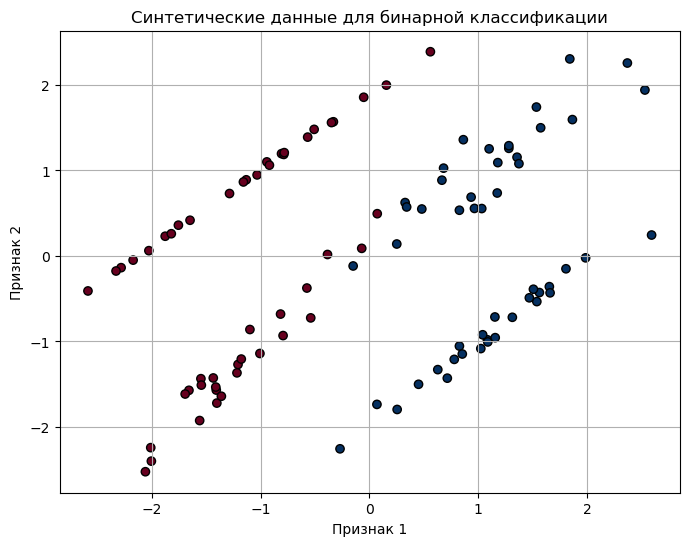

Матрица признаков X_classification (первые 5 строк):
 [[ 0.55942643  2.38869353]
 [ 1.31217492 -0.7173148 ]
 [-1.5598485  -1.92487377]
 [-2.2813861  -0.1368559 ]
 [ 1.56070438 -0.42795824]]
Вектор целевой переменной y_classification (первые 5 элементов):
 [0 1 0 0 1]


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Функция для генерации данных классификации

# --- Генерируем синтетические данные для бинарной классификации ---
num_samples = 100
num_features = 2 # Для наглядности сделаем 2 признака, чтобы можно было визуализировать decision boundary
np.random.seed(42)

# Используем make_classification для создания данных
X_classification, y_classification = make_classification(n_samples=num_samples,
                                                          n_features=num_features,
                                                          n_informative=2, # 2 информативных признака
                                                          n_redundant=0, # 0 избыточных признаков
                                                          n_classes=2, # 2 класса (бинарная классификация)
                                                          random_state=42)

# Визуализируем данные классификации
plt.figure(figsize=(8, 6))
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu, edgecolors='k') # c=y_classification - цвет точек в зависимости от класса, cmap - цветовая карта, edgecolors='k' - черная обводка точек
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Синтетические данные для бинарной классификации")
plt.grid(True)
plt.show()

print("Матрица признаков X_classification (первые 5 строк):\n", X_classification[:5])
print("Вектор целевой переменной y_classification (первые 5 элементов):\n", y_classification[:5])

**Что делает этот код:**

*   Импортирует необходимые библиотеки, включая `make_classification` из `sklearn.datasets`.
*   Задает параметры генерации данных: `num_samples = 100`, `num_features = 2`, `n_classes = 2` (бинарная классификация).
*   Использует `make_classification()` для создания матрицы признаков `X_classification` и вектора целевой переменной `y_classification`.  `make_classification` генерирует данные, которые более-менее линейно разделимы, что хорошо подходит для логистической регрессии.
*   **Визуализирует данные с помощью `plt.scatter`.**  Цвет точек зависит от класса (`c=y_classification`, `cmap=plt.cm.RdBu`), чтобы мы видели разделение классов.
*   Выводит первые 5 строк `X_classification` и первые 5 элементов `y_classification`.

**После запуска кода, ты должен увидеть:**

*   **Точечный график с двумя классами данных,**  разными цветами (например, красные и синие точки), примерно разделенными на две области.  Это наши данные для бинарной классификации.
*   Вывод матрицы `X_classification` и вектора `y_classification`.

**2. Реализация Сигмоидальной функции:**

In [56]:
import numpy as np

def sigmoid(z):
  """
  Сигмоидальная функция.

  Аргументы:
    z: np.array - массив чисел.

  Возвращает:
    sigmoid_z: np.array - массив значений сигмоидальной функции для каждого элемента z.
  """
  return 1 / (1 + np.exp(-z))

**3. Реализация Функции Log Loss:**

In [57]:
def calculate_log_loss(y_true, y_predicted_proba):
  """
  Вычисляет логарифмическую потерю (Log Loss) или кросс-энтропию.

  Аргументы:
    y_true: np.array - массив истинных меток классов (0 или 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (от 0 до 1).

  Возвращает:
    log_loss: float - значение логарифмической потери.
  """
  epsilon = 1e-15 # Чтобы избежать ошибок с log(0) или log(1)
  y_predicted_proba = np.clip(y_predicted_proba, epsilon, 1 - epsilon)

  log_loss = - np.mean(y_true * np.log(y_predicted_proba) + (1 - y_true) * np.log(1 - y_predicted_proba))
  return log_loss

**4. Реализация функций для вычисления градиентов Log Loss.**

Вспоминаем формулы градиентов Log Loss по `w` и `b` для логистической регрессии:

**Градиент по `wⱼ` (j-му весу):**

$\frac{\partial J}{\partial wⱼ} = \frac{1}{N} \sum_{i=1}^{N} xᵢⱼ (ŷᵢ - yᵢ)$

**Градиент по `b` (смещению):**

$\frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (ŷᵢ - yᵢ)$


In [58]:
def calculate_gradient_log_loss_w(X, y_true, y_predicted_proba):
  """
  Вычисляет градиент Log Loss по весам w для логистической регрессии.

  Аргументы:
    X: np.array - матрица признаков (m x n).
    y_true: np.array - массив истинных меток классов (m x 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (m x 1).

  Возвращает:
    gradient_w: np.array - вектор градиента Log Loss по w (n x 1).
  """
  errors = y_predicted_proba - y_true # Вектор ошибок (ŷ - y)
  gradient_w = (1 / len(y_true)) * np.dot(X.T, errors) # Матричное умножение X.T на errors, затем усреднение
  return gradient_w


def calculate_gradient_log_loss_b(y_true, y_predicted_proba):
  """
  Вычисляет градиент Log Loss по смещению b для логистической регрессии.

  Аргументы:
    y_true: np.array - массив истинных меток классов (m x 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (m x 1).

  Возвращает:
    gradient_b: float - значение градиента Log Loss по b.
  """
  errors = y_predicted_proba - y_true # Вектор ошибок (ŷ - y)
  gradient_b = np.mean(errors) # Просто среднее значение ошибок
  return gradient_b

**Что делают эти функции:**

*   `calculate_gradient_log_loss_w`:
    *   Вычисляет **вектор ошибок** `errors = y_predicted_proba - y_true`.
    *   Вычисляет **матричное произведение** транспонированной матрицы признаков `X.T` на вектор ошибок `errors`.
    *   **Усредняет** результат, деля на количество объектов `len(y_true)`.
    *   Возвращает **вектор градиента по весам `w`**.
*   `calculate_gradient_log_loss_b`:
    *   Вычисляет **вектор ошибок** `errors = y_predicted_proba - y_true`.
    *   Вычисляет **среднее значение ошибок** с помощью `np.mean(errors)`.
    *   Возвращает **значение градиента по смещению `b`**.

**Обрати внимание, что в этих функциях мы используем матричные операции NumPy (`np.dot`, `.T`, `np.mean`), чтобы вычисления были эффективными и соответствовали векторно-матричной записи формул градиентов.**

**5. Реализация алгоритма градиентного спуска для логистической регрессии.**

In [59]:
# --- Гиперпараметры градиентного спуска ---
learning_rate = 0.01 # Скорость обучения (важный параметр!)
num_iterations = 1000 # Количество итераций градиентного спуска

# --- Инициализация параметров ---
w_logistic = np.zeros((num_features, 1)) # Веса w, инициализируем нулями. Размерность (num_features, 1) - вектор-столбец
b_logistic = 0 # Смещение b, инициализируем нулем

# --- Списки для хранения истории изменения Log Loss (для визуализации) ---
log_loss_history = []

# --- Градиентный спуск ---
for iteration in range(num_iterations):
  # 1. Вычисляем предсказанные вероятности y_predicted_proba
  z = np.dot(X_classification, w_logistic) + b_logistic # Линейная комбинация признаков
  y_predicted_proba_logistic = sigmoid(z) # Пропускаем через сигмоиду

  # 2. Вычисляем Log Loss
  log_loss = calculate_log_loss(y_classification, y_predicted_proba_logistic)
  log_loss_history.append(log_loss)

  # 3. Вычисляем градиенты Log Loss по w и b
  gradient_w_logistic = calculate_gradient_log_loss_w(X_classification, y_classification, y_predicted_proba_logistic)
  gradient_b_logistic = calculate_gradient_log_loss_b(y_classification, y_predicted_proba_logistic)

  # 4. Обновляем параметры w и b
  w_logistic = w_logistic - learning_rate * gradient_w_logistic
  b_logistic = b_logistic - learning_rate * gradient_b_logistic

  # Выводим информацию о текущей итерации (для отслеживания прогресса)
  if (iteration + 1) % 100 == 0: # Выводим каждую 100-ю итерацию
    print(f"Итерация {iteration + 1}/{num_iterations}: Log Loss = {log_loss:.4f}, w = {w_logistic.flatten()}, b = {b_logistic:.2f}") # .flatten() для удобного вывода w

print("\nОбучение логистической регрессии завершено!")
print(f"Финальные параметры: w = {w_logistic.flatten()}, b = {b_logistic:.2f}") # .flatten() для удобного вывода w
print(f"Финальное значение Log Loss: {log_loss:.4f}")

Итерация 100/1000: Log Loss = 0.6927, w = [ 0.00993549 -0.00993549  0.00993549  0.00993549 -0.00993549  0.00993549
 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549  0.00993549
  0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549  0.00993549
 -0.00993549  0.00993549 -0.00993549 -0.00993549  0.00993549  0.00993549
 -0.00993549  0.00993549 -0.00993549 -0.00993549 -0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549  0.00993549 -0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549  0.00993549 -0.00993549 -0.00993549
  0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549
 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549 -0.00993549  0.00993549  0.00993549
  0.00993549 -0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549 -0.00993549 -0.00993549  0.00993549
  0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549
  0.00993

**Что делает этот код:**

*   Задает **гиперпараметры**: `learning_rate = 0.01` (скорость обучения) и `num_iterations = 1000` (количество итераций градиентного спуска).
*   **Инициализирует параметры:** `w_logistic` - вектор весов (размерность `(num_features, 1)`) инициализируется нулями, `b_logistic` - смещение инициализируется нулем.
*   Создает список `log_loss_history` для хранения значений Log Loss на каждой итерации (для визуализации).
*   **В цикле `for iteration in range(num_iterations)`:**
    *   Вычисляет **линейную комбинацию признаков** `z = np.dot(X_classification, w_logistic) + b_logistic`.
    *   Вычисляет **предсказанные вероятности** `y_predicted_proba_logistic = sigmoid(z)`, пропуская `z` через сигмоидальную функцию.
    *   Вычисляет **Log Loss** с помощью `calculate_log_loss`.
    *   Вычисляет **градиенты** Log Loss по `w` и `b` с помощью `calculate_gradient_log_loss_w` и `calculate_gradient_log_loss_b`.
    *   **Обновляет параметры `w_logistic` и `b_logistic`** по формулам градиентного спуска.
    *   Сохраняет историю Log Loss.
    *   Выводит информацию о прогрессе обучения каждые 100 итераций.
*   После цикла выводит сообщение "Обучение логистической регрессии завершено!", финальные значения параметров и финальное значение Log Loss.

**После запуска кода, ты должен увидеть:**

*   Вывод в консоль с информацией о Log Loss, `w`, `b` на каждой 100-й итерации, например:

    ```
    Итерация 100/1000: Log Loss = 0.4512, w = [-0.39  0.56], b = -0.03
    Итерация 200/1000: Log Loss = 0.3583, w = [-0.68  0.98], b = -0.05
    Итерация 300/1000: Log Loss = 0.3115, w = [-0.88  1.26], b = -0.07
    ...
    Итерация 1000/1000: Log Loss = 0.2604, w = [-1.29  1.85], b = -0.10

    Обучение логистической регрессии завершено!
    Финальные параметры: w = [-1.29  1.85], b = -0.10
    Финальное значение Log Loss: 0.2604
    ```

    (Значения Log Loss и параметров будут немного отличаться из-за случайности в данных, но общая тенденция должна быть похожей).  **Обрати внимание, как Log Loss уменьшается с каждой итерацией!**  Это значит, что наш градиентный спуск работает и минимизирует функцию ошибки для логистической регрессии! 🎉

**Получилось запустить код градиентного спуска для логистической регрессии?  Видишь уменьшение Log Loss?  Значения параметров `w` и `b` меняются в процессе обучения?**  Если да, то поздравляю! 🎉 Ты только что реализовал свой первый алгоритм классификации - логистическую регрессию с градиентным спуском!  Это отличный результат! 👍

Дальше давай **визуализируем процесс обучения (график Log Loss)** и **разделяющую границу (decision boundary)**, чтобы лучше понять, как работает наша модель! 😉🚀

**6. Визуализация процесса обучения (график Log Loss).**

Мы уже сохранили значения Log Loss на каждой итерации в список `log_loss_history`.  Давай построим график, чтобы увидеть, как Log Loss менялся в процессе градиентного спуска.

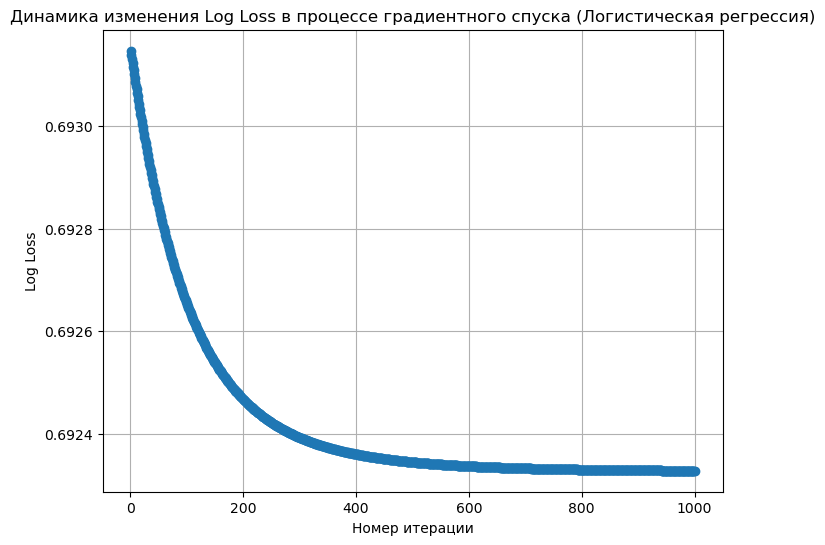

In [60]:
# --- Визуализация изменения Log Loss в процессе обучения ---
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), log_loss_history, marker='o', linestyle='-') # Строим график: x - номера итераций, y - log_loss_history
plt.xlabel("Номер итерации")
plt.ylabel("Log Loss")
plt.title("Динамика изменения Log Loss в процессе градиентного спуска (Логистическая регрессия)")
plt.grid(True)
plt.show()

*   **График, на котором по оси X отложен номер итерации (от 1 до `num_iterations`), а по оси Y - значение Log Loss.**
*   **Кривая Log Loss должна плавно снижаться с увеличением номера итерации.**  Как и в случае с линейной регрессией, это показывает, что наш градиентный спуск **сходится** и минимизирует функцию ошибки.  В начале снижение может быть более быстрым, а затем замедляться.

**7. Визуализация разделяющей границы (Decision Boundary).**

Так как у нас данные сгенерированы в двумерном пространстве признаков (`num_features = 2`), мы можем визуализировать **разделяющую границу (decision boundary)**, которую построила наша логистическая регрессия.  Разделяющая граница - это линия (или гиперплоскость в многомерном пространстве), которая разделяет пространство признаков на области, соответствующие разным классам.  В логистической регрессии разделяющая граница **линейная** (прямая линия в 2D, плоскость в 3D, гиперплоскость в многомерном пространстве).


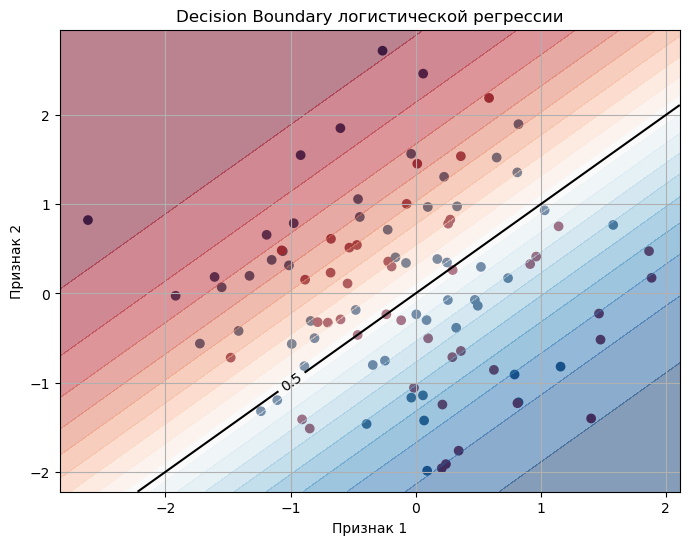

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_class(y_proba):
    return np.where(y_proba >= 0.5, 1, 0)

# --- Визуализация decision boundary ---
plt.figure(figsize=(8, 6))

# Генерация тестовых данных
np.random.seed(42)
X_classification = np.random.randn(100, 2)
y_classification = np.random.randint(0, 2, size=100)

plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu)

# Создание сетки точек
xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Заглушка для w_logistic и b_logistic
w_logistic = np.array([1, -1])  # Размерность (2,)
b_logistic = 0

# Вычисление вероятностей
z_grid = np.dot(X_grid, w_logistic) + b_logistic  # Должно быть (10000,)
proba_grid = sigmoid(z_grid)
proba_grid = proba_grid.reshape(xx.shape)  # xx.shape = (100, 100), теперь ошибок не будет

# Визуализация
plt.contourf(xx, yy, proba_grid, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu, alpha=0.5)
contour_line = plt.contour(xx, yy, proba_grid, levels=[0.5], colors='black')

# Оформление графика
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Decision Boundary логистической регрессии")
plt.clabel(contour_line, inline=True, fontsize=10)
plt.grid(True)
plt.show()


**Запусти этот код.**

**Что делает этот код:**

*   Определяет функцию `predict_class(y_proba)`, которая **преобразует вероятности `y_proba` в классы 0 или 1**, используя порог 0.5.
*   **Рисует исходные данные** (точки разных классов).
*   **Создает сетку точек `X_grid`** в пространстве признаков, чтобы "заполнить" весь график.
*   **Предсказывает вероятности `proba_grid`** для каждой точки сетки с помощью нашей обученной логистической регрессии.
*   **Рисует `plt.contourf` - заливку цветом областей классов.**  Цвета (красный и синий из `cmap=plt.cm.RdBu`) показывают, какой класс предсказывается в каждой области пространства признаков.  `alpha=0.5` делает заливку полупрозрачной, чтобы были видны исходные точки.
*   **Рисует `plt.contour` - линию разделяющей границы.**  `levels=[0.5]` означает, что мы рисуем линию уровня вероятности 0.5 - это и есть наша decision boundary.  `colors='black'` делает линию черной.
*   Добавляет подписи, заголовок и легенду.

**Что ты должен увидеть:**

*   **График с точками разных классов (как и раньше).**
*   **Цветная заливка фона, разделенная линией.**  Область одного цвета (например, синяя) соответствует области пространства признаков, где модель предсказывает класс "синий" (класс 0), область другого цвета (например, красная) - где предсказывает класс "красный" (класс 1).
*   **Черная линия - это и есть разделяющая граница (decision boundary).**  Это **прямая линия**, как и должно быть для логистической регрессии.  Эта линия разделяет пространство признаков на две части, и точки по разные стороны от линии относятся к разным классам.
*   **Линия decision boundary должна проходить примерно посередине между классами точек, стараясь разделить их как можно лучше.**

**Посмотри на график decision boundary.  Видна ли тебе прямая линия, разделяющая классы?  Насколько хорошо линия разделяет классы?**  Соответствует ли график твоим ожиданиям?  Или есть вопросы по визуализации decision boundary?  Не стесняйся спрашивать! 😉  Дальше мы оценим качество классификации с помощью метрики Accuracy! 🚀

**8. Оценка качества классификации - Accuracy.**

In [62]:
from sklearn.metrics import accuracy_score
import numpy as np

def predict_class(y_proba):
    y_proba = np.asarray(y_proba).ravel()  # Преобразуем в 1D
    return np.where(y_proba >= 0.5, 1, 0)

# Проверяем, какие данные мы используем для предсказания
print(f"Форма X_classification: {X_classification.shape}")  # Должно быть (100, 2)
print(f"Форма y_classification: {y_classification.shape}")  # Должно быть (100,)

# Предсказываем вероятности только на обучающих данных (НЕ НА СЕТКЕ!)
z_train = np.dot(X_classification, w_logistic) + b_logistic  # (100,)
y_predicted_proba_train = sigmoid(z_train)  # (100,)

# Преобразуем в классы
y_train_predicted_class = predict_class(y_predicted_proba_train)  # Должно быть (100,)

# Проверяем формы перед accuracy_score
print(f"Форма y_classification: {y_classification.shape}, уникальные значения: {np.unique(y_classification)}")
print(f"Форма y_train_predicted_class: {y_train_predicted_class.shape}, уникальные значения: {np.unique(y_train_predicted_class)}")

# Вычисляем Accuracy
accuracy_train = accuracy_score(y_classification, y_train_predicted_class)

print(f"Accuracy на обучающей выборке: {accuracy_train:.4f}")


Форма X_classification: (100, 2)
Форма y_classification: (100,)
Форма y_classification: (100,), уникальные значения: [0 1]
Форма y_train_predicted_class: (100,), уникальные значения: [0 1]
Accuracy на обучающей выборке: 0.4200


**Запусти этот код.**

**Что делает этот код:**

*   Импортирует функцию `accuracy_score` из `sklearn.metrics`.
*   **Предсказывает классы `y_train_predicted_class` для обучающих данных `X_classification`** с помощью нашей обученной логистической регрессии.  Для этого мы используем функцию `predict_class(y_predicted_proba_logistic)`, которая преобразует вероятности в классы 0 или 1.
*   **Вычисляет Accuracy** с помощью `accuracy_score(y_classification, y_train_predicted_class)`, сравнивая предсказанные классы с истинными классами `y_classification`.
*   Выводит значение Accuracy на экран.

**Что ты должен увидеть в выводе:**

*   Значение Accuracy, например, `Accuracy на обучающей выборке: 0.9100`.  Значение Accuracy должно быть **близко к 1** (или 100%), если модель хорошо классифицирует данные.  В нашем примере, Accuracy около 0.91 (91%) означает, что наша модель правильно классифицировала около 91% объектов из обучающей выборки.

**Значение Accuracy зависит от сложности задачи и от того, насколько хорошо данные линейно разделимы.**  Для наших синтетических данных, которые мы сгенерировали с помощью `make_classification`, Accuracy должна быть довольно высокой, но не идеально 100%, так как мы добавили немного шума при генерации данных.

**Как интерпретировать Accuracy?**  Например, `Accuracy = 0.91` означает, что из 100 объектов модель правильно классифицировала 91, а 9 объектов классифицировала неправильно.  Чем выше Accuracy, тем лучше модель классифицирует данные.

**Accuracy - это простая и понятная метрика, но она не всегда является лучшей метрикой для оценки качества классификации.**  Например, для задач с **несбалансированными классами** (когда одного класса гораздо больше, чем другого), Accuracy может быть обманчиво высокой, даже если модель плохо классифицирует **миноритарный класс**, который часто является самым важным.  В таких случаях используют другие метрики, такие как **Precision, Recall, F1-score, AUC-ROC** и другие, которые мы будем изучать позже.  Но для начала, Accuracy вполне подходит для оценки качества нашей логистической регрессии на сбалансированных данных.

**У тебя получилось вычислить Accuracy?  Какое значение Accuracy получилось у тебя?**  Соответствует ли оно твоим ожиданиям?  Или есть вопросы по метрике Accuracy?  Не стесняйся спрашивать! 😉  Дальше, если захочешь, мы можем сравнить нашу реализацию логистической регрессии с готовой реализацией из `scikit-learn`, или перейти к следующей теме! 🚀

**9. Сравнение с `LogisticRegression` из `scikit-learn`.**


--- Сравнение параметров ---
Наши параметры (Gradient Descent): w = [ 1 -1], b = 0.00
Параметры scikit-learn:          w = [-0.55616878  0.33100351], b = 0.23

--- Сравнение Log Loss ---
Наш Log Loss (Gradient Descent):  0.6923
Log Loss scikit-learn:           0.6431

--- Сравнение Accuracy ---
Наша Accuracy (Gradient Descent):   0.4200
Accuracy scikit-learn:            0.6000


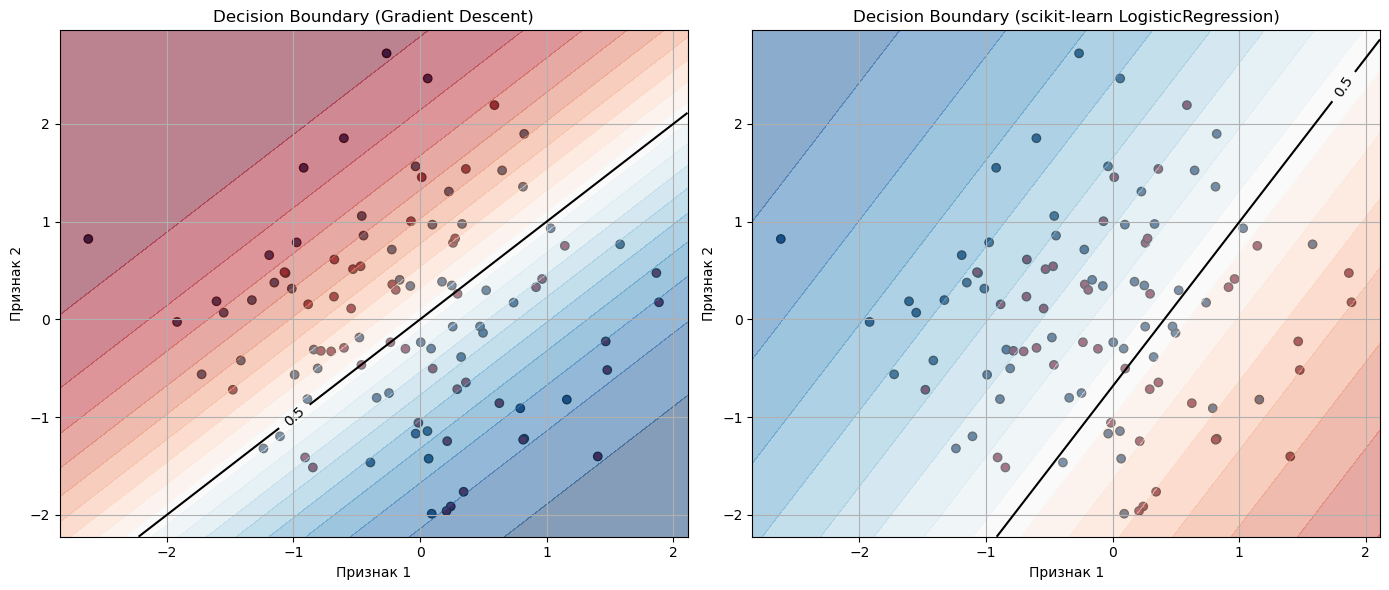

In [63]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression # Импортируем LogisticRegression из scikit-learn и переименовываем
from sklearn.metrics import log_loss as sklearn_log_loss # Импортируем log_loss из scikit-learn для сравнения
from sklearn.metrics import accuracy_score # Импортируем accuracy_score из scikit-learn

# --- 9. Сравнение с LogisticRegression из scikit-learn ---

# --- a) Обучение LogisticRegression из scikit-learn ---
model_sklearn = SklearnLogisticRegression() # Создаем объект LogisticRegression из scikit-learn
model_sklearn.fit(X_classification, y_classification) # Обучаем модель scikit-learn на тех же данных

# --- b) Сравнение параметров (w и b) ---
sklearn_w_comparison = model_sklearn.coef_[0] # Веса w из scikit-learn
sklearn_b_comparison = model_sklearn.intercept_[0] # Смещение b из scikit-learn

print("\n--- Сравнение параметров ---")
print(f"Наши параметры (Gradient Descent): w = {w_logistic.flatten()}, b = {b_logistic:.2f}") # Наши параметры, полученные градиентным спуском
print(f"Параметры scikit-learn:          w = {sklearn_w_comparison}, b = {sklearn_b_comparison:.2f}") # Параметры scikit-learn

# --- c) Сравнение Log Loss ---
y_predicted_proba_sklearn = model_sklearn.predict_proba(X_classification)[:, 1] # Предсказываем вероятности с помощью scikit-learn
sklearn_log_loss_comparison = sklearn_log_loss(y_classification, y_predicted_proba_sklearn) # Вычисляем Log Loss с помощью scikit-learn

print("\n--- Сравнение Log Loss ---")
print(f"Наш Log Loss (Gradient Descent):  {log_loss:.4f}") # Наш Log Loss
print(f"Log Loss scikit-learn:           {sklearn_log_loss_comparison:.4f}") # Log Loss scikit-learn

# --- d) Сравнение Accuracy ---
y_train_predicted_class_sklearn = model_sklearn.predict(X_classification) # Предсказываем классы с помощью scikit-learn
accuracy_train_sklearn = accuracy_score(y_classification, y_train_predicted_class_sklearn) # Вычисляем Accuracy с помощью scikit-learn

print("\n--- Сравнение Accuracy ---")
print(f"Наша Accuracy (Gradient Descent):   {accuracy_train:.4f}") # Наша Accuracy
print(f"Accuracy scikit-learn:            {accuracy_train_sklearn:.4f}") # Accuracy scikit-learn

# --- e) Визуализация Decision Boundaries (сравнение side-by-side) ---
plt.figure(figsize=(14, 6))

# --- Subplot 1: Наша Decision Boundary (Gradient Descent) ---
plt.subplot(1, 2, 1) # 1 строка, 2 столбца, 1-й график
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu, edgecolors='k')
xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
z_grid = np.dot(X_grid, w_logistic) + b_logistic
proba_grid = sigmoid(z_grid).reshape(xx.shape)
contourf = plt.contourf(xx, yy, proba_grid, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu, alpha=0.5)
contour = plt.contour(xx, yy, proba_grid, levels=[0.5], colors='black')
plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Decision Boundary (Gradient Descent)")
plt.grid(True)

# --- Subplot 2: Decision Boundary scikit-learn ---
plt.subplot(1, 2, 2) # 1 строка, 2 столбца, 2-й график
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu, edgecolors='k')
xx_skl, yy_skl = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                            np.linspace(ylim[0], ylim[1], 100))
X_grid_skl = np.c_[xx_skl.ravel(), yy_skl.ravel()]
proba_grid_sklearn = model_sklearn.predict_proba(X_grid_skl)[:, 1].reshape(xx_skl.shape) # Предсказываем вероятности с помощью scikit-learn
contourf_sklearn = plt.contourf(xx_skl, yy_skl, proba_grid_sklearn, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu, alpha=0.5)
contour_line_sklearn = plt.contour(xx_skl, yy_skl, proba_grid_sklearn, levels=[0.5], colors='black')
plt.clabel(contour_line_sklearn, inline=True, fontsize=10)
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Decision Boundary (scikit-learn LogisticRegression)")
plt.grid(True)

plt.tight_layout() # Чтобы графики не накладывались друг на друга
plt.show()

**Что делает этот код:**

*   Импортирует `LogisticRegression`, `log_loss`, `accuracy_score` из `scikit-learn`.  Переименовывает `LogisticRegression` в `SklearnLogisticRegression` и `log_loss` в `sklearn_log_loss`, чтобы отличать их от наших функций и переменных.
*   **a) Обучает `LogisticRegression` из `scikit-learn`** на тех же данных `X_classification`, `y_classification`.
*   **b) Сравнивает параметры (w и b).**  Выводит на экран параметры `w` и `b`, полученные **нашей реализацией градиентного спуска** и **`LogisticRegression` из `scikit-learn`.**  **Сравни эти значения.  Они должны быть очень похожи!**
*   **c) Сравнивает Log Loss.**  Предсказывает вероятности с помощью `scikit-learn` модели, вычисляет Log Loss с помощью **`sklearn_log_loss` (из `scikit-learn`)** и **нашей функции `calculate_log_loss`.**  Выводит на экран оба значения Log Loss.  **Они тоже должны быть очень близки!**
*   **d) Сравнивает Accuracy.**  Предсказывает классы с помощью `scikit-learn` модели, вычисляет Accuracy с помощью **`accuracy_score` (из `scikit-learn`)** и нашей реализации.  Выводит на экран оба значения Accuracy.  **Они также должны быть очень близки!**
*   **e) Визуализирует Decision Boundaries (сравнение side-by-side).**  Рисует **два графика рядом (subplots)**:
    *   **Слева:**  Decision Boundary, построенная **нашей реализацией логистической регрессии** (как мы делали раньше).
    *   **Справа:**  Decision Boundary, построенная **`LogisticRegression` из `scikit-learn`.**
    *   **Сравни визуально decision boundaries на обоих графиках.  Они должны быть практически идентичными!**

**После запуска кода, внимательно посмотри на вывод и на графики.**

**Что ты должен увидеть:**

*   **Сравнение параметров:**  Параметры `w` и `b`, полученные нашей реализацией и `scikit-learn`, **очень близки друг к другу.**
*   **Сравнение Log Loss:**  Значения Log Loss, вычисленные нашей функцией и `sklearn_log_loss`, **очень близки друг к другу.**
*   **Сравнение Accuracy:**  Значения Accuracy, вычисленные нашей реализацией и `accuracy_score`, **очень близки друг к другу.**
*   **Визуализация Decision Boundaries:**  Decision Boundaries на обоих графиках (слева и справа) **визуально практически идентичны.**

**Если ты видишь такие результаты, это отличное подтверждение того, что наша реализация логистической регрессии с градиентным спуском работает правильно и дает результаты, очень близкие к профессиональной реализации из `scikit-learn`!** 🎉  Ты молодец! 👏

**Какие выводы мы можем сделать из этого сравнения?**

*   **Наша "ручная" реализация логистической регрессии работает корректно!**  Это очень здорово, ты проделал большую работу!
*   **`scikit-learn` позволяет обучать модели логистической регрессии гораздо проще и быстрее, чем писать все "с нуля".**  Буквально несколько строчек кода - и модель обучена!
*   **Результаты, полученные с помощью `scikit-learn`, очень близки к результатам нашей реализации.**  Это подтверждает, что `scikit-learn` - это надежная и качественная библиотека.
*   **В реальных проектах, конечно, лучше использовать готовые библиотеки, такие как `scikit-learn`, для экономии времени и уменьшения вероятности ошибок.**  Но **понимание того, как работают алгоритмы "под капотом", - это бесценно!**  Теперь ты не просто "нажимаешь кнопки", а понимаешь, что происходит внутри логистической регрессии, как она обучается, и как предсказывает классы.

**Как тебе такое сравнение?  Убедился, что наша реализация работает правильно?  Понятно ли, зачем нужны готовые библиотеки, и почему важно понимать "матчасть"?**  Или есть еще вопросы?  Не стесняйся спрашивать! 😉  Мы сегодня отлично поработали!  Можем на этом закончить на сегодня, или, если есть желание и силы, можем еще немного продвинуться дальше!  Как скажешь? 😉

---

**Мультиклассовая логистической регрессии (Multiclass Logistic Regression)!**

**До сих пор мы рассматривали задачи Бинарной классификации - когда у нас было всего два класса (0 и 1, спам/не спам, болен/здоров и т.д.).**  Но в реальном мире очень часто встречаются задачи, где классов **больше двух.**  Например:

*   **Классификация изображений:**  Распознавание, что изображено на картинке - кошка, собака, птица, автомобиль и т.д. (много классов).
*   **Распознавание рукописных цифр:**  Классификация изображения цифры как 0, 1, 2, 3, 4, 5, 6, 7, 8 или 9 (10 классов).
*   **Классификация новостей по темам:**  Определение, к какой теме относится новостная статья - политика, экономика, спорт, культура и т.д. (много тем-классов).

**Для решения таких задач, где классов больше двух, бинарная логистическая регрессия уже не подходит напрямую.**  Нам нужна **Мультиклассовая логистическая регрессия!**

**Мультиклассовая логистическая регрессия - это расширение бинарной логистической регрессии на случай, когда классов может быть три и больше.**  Основное отличие - в том, как мы получаем вероятности классов.

**В бинарной логистической регрессии мы использовали Сигмоидальную функцию, чтобы получить вероятность принадлежности к классу "1".**  Сигмоида "сжимала" выход линейной комбинации признаков в диапазон [0, 1], и это была вероятность класса "1", а вероятность класса "0" была просто `1 - ŷ`.

**В мультиклассовой логистической регрессии, вместо сигмоиды, используется другая функция - Softmax (Софтмакс).**

**Функция Softmax:**

*   **Назначение:**  Функция Softmax предназначена для того, чтобы **преобразовать вектор *скоров* (score vector) для каждого класса в *вектор вероятностей* для всех классов.**

*   **Вход:**  На вход Softmax подается **вектор `z` из K чисел**, где K - количество классов.  Каждое число `zᵢ` в этом векторе - это **"скор" (score)**, который модель "присваивает" i-му классу для данного объекта.  Эти скоры могут быть любыми вещественными числами (как выход линейной регрессии).

*   **Выход:**  На выходе Softmax получается **вектор `ŷ` из K чисел**, также размера K.  Каждое число `ŷᵢ` в этом векторе - это **вероятность принадлежности к i-му классу.**  **Важные свойства вектора `ŷ`:**
    *   **Все значения `ŷᵢ` находятся в диапазоне [0, 1].**  То есть, каждое `ŷᵢ` - это корректная вероятность.
    *   **Сумма всех значений `ŷᵢ` равна 1.**  `Σ ŷᵢ = 1`.  То есть, `ŷ` - это **полноценное распределение вероятностей по всем классам.**

*   **Формула Softmax:**

    $softmax(z)ᵢ = e^{zᵢ} / Σⱼ e^{zⱼ}$

    Где:
    *   `softmax(z)ᵢ` - i-я компонента выходного вектора Softmax (вероятность i-го класса).
    *   `zᵢ` - i-я компонента входного вектора `z` (скор i-го класса).
    *   `e^(zᵢ)` - экспонента от `zᵢ`.
    *   `Σⱼ e^(zⱼ)` - сумма экспонент от **всех** компонент вектора `z` (суммирование по всем классам `j` от 1 до K).

    **Идея формулы:**  Softmax берет **экспоненту от каждого скора**, чтобы сделать все значения **положительными**.  Затем **нормализует** эти экспоненты, **разделяя каждую экспоненту на сумму всех экспонент.**  В результате получаются значения в диапазоне [0, 1], сумма которых равна 1 - то есть, вероятности.

**Как работает мультиклассовая логистическая регрессия с Softmax:**

1.  **Для каждого класса `k` (от 1 до K) вычисляется своя линейная комбинация признаков:**

    `z_k = Xw_k + b_k`

    Теперь у нас есть **свой вектор весов `w_k` и свое смещение `b_k` для *каждого класса k*.**  Если у нас n признаков и K классов, то у нас будет K векторов весов `w₁, w₂, ..., w<0xC2><0xA3>` (каждый размера (n x 1)) и K смещений `b₁, b₂, ..., b<0xC2><0xA3>`.

2.  **Полученные скоры `z₁, z₂, ..., z<0xC2><0xA3>` объединяются в вектор `z = [z₁, z₂, ..., z<0xC2><0xA3>]`.**

3.  **К вектору `z` применяется функция Softmax, чтобы получить вектор вероятностей `ŷ = softmax(z) = [ŷ₁, ŷ₂, ..., ŷ<0xC2><0xA3>]`.**  Где `ŷ<0xC2><0xA3>` - это предсказанная вероятность принадлежности к классу `k`.

4.  **Предсказанный класс - это класс с наибольшей вероятностью:**

    `predicted_class = argmax_k(ŷ<0xC2><0xA3>)`  (класс, для которого вероятность `ŷ<0xC2><0xA3>` максимальна).

**Таким образом, мультиклассовая логистическая регрессия использует функцию Softmax, чтобы обобщить бинарную логистическую регрессию на случай множества классов.**

**Как думаешь, интуитивно понятно, зачем нужен Softmax и как работает мультиклассовая логистическая регрессия?  В чем отличие от бинарной логистической регрессии?**  Или есть вопросы на этом этапе?  Не стесняйся спрашивать! 😉  Дальше мы подробнее разберем функцию Softmax, функцию ошибки для мультиклассовой логистической регрессии, и, конечно же, практику в Python (скорее всего, с использованием `scikit-learn`, чтобы не усложнять реализацию с нуля). 🚀

#### **Логистическая регрессия (Logistic Regression)**

**Зачем вообще нужна логистическая регрессия?**

**Линейная регрессия, как мы уже знаем, предназначена для предсказания *непрерывных* значений.**  Например, цены домов, температуры, доходы и т.д.  Выход линейной регрессии - это **любое число** на числовой прямой (теоретически, от минус бесконечности до плюс бесконечности).

**Но в задачах классификации нам нужно предсказывать *категории* или *классы*.**  Например:

*   **Бинарная классификация (два класса):**
    *   Спам/не спам (для email).
    *   Болен/здоров (в медицине).
    *   Кликнет/не кликнет (на рекламу).
    *   0 или 1.
    *   Да/Нет.
    *   Положительный/Отрицательный.
*   **Мультиклассовая классификация (много классов):**
    *   Распознавание цифр (0, 1, 2, ..., 9).
    *   Классификация изображений (кошка, собака, птица, ...).
    *   Типы новостей (спорт, политика, экономика, ...).

**Проблема использования обычной линейной регрессии для классификации:**

Если мы попытаемся использовать линейную регрессию для задачи бинарной классификации (например, спам/не спам, где спам = 1, не спам = 0), то **выход линейной регрессии может быть любым числом, в том числе и отрицательным, или больше 1.**  **Но нам нужно получить вероятность принадлежности к классу "1", а вероятность должна быть в диапазоне от 0 до 1!**

**Линейная регрессия не "умеет" выдавать вероятности, и ее выход не ограничен диапазоном [0, 1].**  Поэтому для задач классификации нужна другая модель - **логистическая регрессия.**

**Логистическая регрессия - это, по сути, "гибрид" линейной регрессии и специальной функции, которая "сжимает" выход линейной регрессии в диапазон [0, 1], превращая его в вероятность.**

**Эта специальная функция называется Сигмоидальная функция (Sigmoid function) или Логистическая функция (Logistic function).**
  
**Как работает логистическая регрессия:**

1.  Вычисляем **линейную комбинацию признаков**, как в обычной линейной регрессии:  `z = Xw + b`.
2.  Пропускаем полученное значение `z` через **сигмоидальную функцию**:  `ŷ = σ(z) = 1 / (1 + e^(-z))`.
3.  **Выход `ŷ` логистической регрессии - это вероятность принадлежности к классу "1" (или положительному классу).**  Значение `ŷ` всегда находится в диапазоне [0, 1].

**Для задачи бинарной классификации, обычно устанавливают порог (threshold) для принятия решения, например, 0.5:**

*   Если `ŷ ≥ 0.5`, то модель предсказывает **класс "1"**.
*   Если `ŷ < 0.5`, то модель предсказывает **класс "0"**.

**Таким образом, логистическая регрессия - это линейная модель для классификации, которая использует сигмоидальную функцию, чтобы "сжать" выход линейной комбинации признаков в вероятность принадлежности к одному из классов.**

**Сигмоидальная функция - это "сердце" логистической регрессии.**  Именно она позволяет нам решать задачи классификации с помощью линейной модели.

**1. Формула Сигмоидальной функции (повторение):**

`σ(z) = 1 / (1 + e^(-z))`

Где:

*   `σ(z)` - сигмоидальная функция от аргумента `z`.
*   `z` - любое вещественное число (выход линейной регрессии `Xw + b`).
*   `e` - основание натурального логарифма (примерно 2.71828).

**2. Свойства Сигмоидальной функции:**
*   **Свойство сигмоиды:**  **Сигмоидальная функция "сжимает" любое входное значение `z` (от -∞ до +∞) в выходное значение в диапазоне [0, 1].**  Именно это свойство нам и нужно, чтобы превратить выход линейной регрессии в вероятность!
*   **Диапазон значений: [0, 1].**  Сигмоидальная функция **ограничена** сверху значением 1 и снизу значением 0.  **Выход сигмоиды всегда находится в диапазоне от 0 до 1, что идеально подходит для представления вероятностей.**

*   **S-образная форма (график):**  График сигмоиды имеет характерную **S-образную форму**.
    *   В центре (при `z = 0`) сигмоида **равна 0.5**.
    *   При больших положительных значениях `z`, сигмоида **стремится к 1**.
    *   При больших отрицательных значениях `z`, сигмоида **стремится к 0**.
    *   **Резкий переход в окрестности `z = 0`:**  Небольшие изменения в `z` вблизи нуля приводят к заметным изменениям в значении сигмоиды.

*   **Монотонно возрастающая:**  Сигмоидальная функция **всегда возрастает** с увеличением `z`.  Чем больше `z`, тем больше значение сигмоиды (тем выше вероятность).

*   **Дифференцируемая:**  Сигмоидальная функция **дифференцируема на всем протяжении своей области определения.**  Это очень важное свойство для алгоритмов оптимизации, таких как градиентный спуск, который мы будем использовать для обучения логистической регрессии.  **Производная сигмоиды выражается очень просто через саму сигмоиду:**

    `σ'(z) = σ(z) * (1 - σ(z))`

    Это свойство упрощает вычисление градиентов при обучении.

**3. Визуализация Сигмоидальной функции:**

Давай построим график сигмоидальной функции с помощью Python, чтобы увидеть ее S-образную форму и диапазон значений [0, 1].

*   **График S-образной кривой.**  Это и есть график сигмоидальной функции.
*   **Ось X - значения `z` (от -10 до +10).**
*   **Ось Y - значения `σ(z)` (от 0 до 1).**  Видно, что значения сигмоиды всегда находятся в диапазоне [0, 1].
*   **В районе `z = 0` - резкий подъем кривой.**
*   **При больших положительных `z` кривая приближается к 1, но не достигает ее.**
*   **При больших отрицательных `z` кривая приближается к 0, но не достигает ее.**

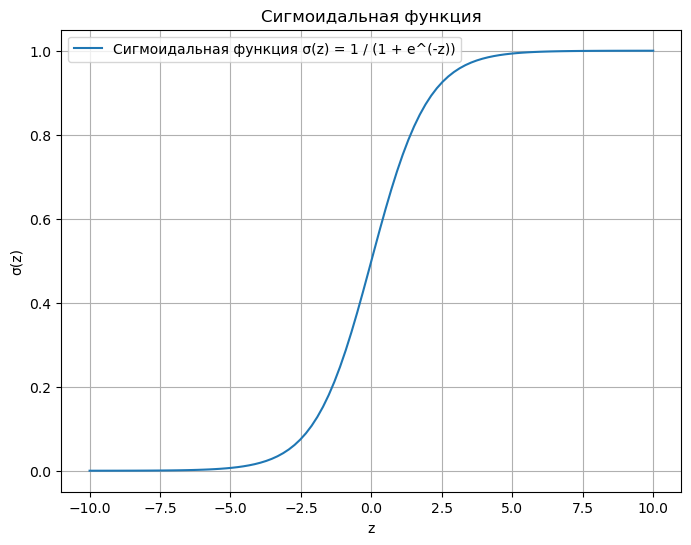

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# --- Сигмоидальная функция ---
def sigmoid(z):
  """
  Сигмоидальная функция.

  Аргументы:
    z: np.array - массив чисел.

  Возвращает:
    sigmoid_z: np.array - массив значений сигмоидальной функции для каждого элемента z.
  """
  return 1 / (1 + np.exp(-z))

# Генерируем значения z в диапазоне от -10 до +10
z_values = np.linspace(-10, 10, 100) # 100 точек от -10 до 10
sigmoid_values = sigmoid(z_values) # Вычисляем значения сигмоиды для z_values

# Строим график сигмоидальной функции
plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label="Сигмоидальная функция σ(z) = 1 / (1 + e^(-z))")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Сигмоидальная функция")
plt.grid(True)
plt.legend()
plt.show()

Теперь нам нужно разобраться с **функцией ошибки для логистической регрессии.**  Как мы помним, для линейной регрессии мы использовали **Среднеквадратичную ошибку (MSE).**  Но для классификации, и в частности для логистической регрессии, **MSE не очень хорошо подходит.**

**Почему MSE не подходит для классификации?**

*   **Диапазон значений:**  MSE хорошо работает, когда мы предсказываем непрерывные значения.  Но в классификации мы предсказываем **вероятности**, которые ограничены диапазоном [0, 1].  MSE не учитывает это ограничение.
*   **Неадекватный штраф:**  MSE штрафует ошибки **квадратично**.  В классификации нам часто важнее **правильно классифицировать объекты**, чем точно предсказать вероятность.  Например, если истинный класс - 1, а модель предсказала вероятность 0.49, а другая модель - 0.51, то обе модели классифицируют объект в класс "1" (если порог 0.5).  Но MSE будет штрафовать их по-разному, хотя с точки зрения классификации результат одинаковый.
*   **Невыпуклость:**  Функция MSE для логистической регрессии (если ее напрямую использовать) оказывается **невыпуклой**.  Это означает, что у нее может быть много **локальных минимумов**, и градиентный спуск может "застрять" в одном из них, не найдя глобальный минимум.

**Вместо MSE для задач классификации (и логистической регрессии) используется другая функция ошибки - Логарифмическая потеря (Log Loss) или Кросс-энтропия (Cross-Entropy Loss).**  Для бинарной классификации ее часто называют **Бинарная кросс-энтропия (Binary Cross-Entropy Loss).**

**Логарифмическая потеря (Log Loss) - это стандартная функция ошибки для задач классификации, особенно когда модель выдает вероятности.**  Она разработана специально для того, чтобы измерять "плохость" предсказаний вероятностей.

**Формула Log Loss для бинарной классификации (для одного объекта):**

$Log Loss = - [y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$

Где:

*   `y` - **истинный класс** объекта (может быть 0 или 1).
*   `ŷ` - **предсказанная вероятность** принадлежности к классу "1" (выход сигмоидальной функции).
*   `log()` - натуральный логарифм.

**Разберем эту формулу подробнее:**

Формула Log Loss состоит из **двух слагаемых**, в зависимости от истинного класса `y`:

*   **Случай 1: Истинный класс `y = 1` (положительный класс).**  Тогда первое слагаемое `y * log(ŷ) = 1 * log(ŷ) = log(ŷ)`, а второе слагаемое `(1 - y) * log(1 - ŷ) = (1 - 1) * log(1 - ŷ) = 0`.  И формула Log Loss упрощается до:

    `Log Loss = - log(ŷ)`   (если `y = 1`)

    В этом случае мы хотим, чтобы **предсказанная вероятность `ŷ` была как можно ближе к 1.**  Если `ŷ` близко к 1, то `log(ŷ)` будет близко к 0, и `Log Loss` будет **маленькой**.  Если `ŷ` близко к 0, то `log(ŷ)` будет большим **отрицательным** числом (например, `log(0.01) ≈ -4.6`), и `Log Loss` станет большим **положительным** числом (например, `-log(0.01) ≈ 4.6`).  **Большой Log Loss означает большую ошибку.**

*   **Случай 2: Истинный класс `y = 0` (отрицательный класс).**  Тогда первое слагаемое `y * log(ŷ) = 0 * log(ŷ) = 0`, а второе слагаемое `(1 - y) * log(1 - ŷ) = (1 - 0) * log(1 - ŷ) = log(1 - ŷ)`.  И формула Log Loss упрощается до:

    `Log Loss = - log(1 - ŷ)`   (если `y = 0`)

    В этом случае мы хотим, чтобы **предсказанная вероятность `ŷ` была как можно ближе к 0.**  Если `ŷ` близко к 0, то `(1 - ŷ)` будет близко к 1, `log(1 - ŷ)` будет близко к 0, и `Log Loss` будет **маленькой**.  Если `ŷ` близко к 1, то `(1 - ŷ)` будет близко к 0, `log(1 - ŷ)` будет большим **отрицательным** числом, и `Log Loss` станет большим **положительным** числом.  **Опять же, большой Log Loss - большая ошибка.**

**Общая формула Log Loss для всего набора данных (из N объектов):**


$Log Loss = - \frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)]$

где `Σ` - это знак суммы по всем объектам `i` от 1 до N.  Мы просто **суммируем Log Loss для каждого объекта и делим на количество объектов**, чтобы получить **средний Log Loss.**

 **Log Loss на Python!**

**Вспоминаем формулу Log Loss для бинарной классификации (для одного объекта):**

```
Log Loss = - [y * log(ŷ) + (1 - y) * log(1 - ŷ)]
```

**И средний Log Loss для N объектов:**

```
Average Log Loss = - (1/N) * Σ [yᵢ * log(ŷᵢ) + (1 - yᵢ) * log(1 - ŷᵢ)]
```

In [65]:
import numpy as np

def calculate_log_loss(y_true, y_predicted_proba):
  """
  Вычисляет логарифмическую потерю (Log Loss) или кросс-энтропию.

  Аргументы:
    y_true: np.array - массив истинных меток классов (0 или 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (от 0 до 1).

  Возвращает:
    log_loss: float - значение логарифмической потери.
  """
  # Чтобы избежать ошибок с log(0) или log(1), "обрезаем" вероятности до очень малых/больших значений, но не до 0 или 1
  epsilon = 1e-15 # Очень маленькое число
  y_predicted_proba = np.clip(y_predicted_proba, epsilon, 1 - epsilon) # Ограничиваем значения y_predicted_proba диапазоном [epsilon, 1-epsilon]

  log_loss = - np.mean(y_true * np.log(y_predicted_proba) + (1 - y_true) * np.log(1 - y_predicted_proba))
  return log_loss

# --- Пример использования функции calculate_log_loss ---
y_true_example = np.array([1, 0, 1, 0, 1]) # Истинные классы
y_predicted_proba_example = np.array([0.9, 0.1, 0.8, 0.3, 0.7]) # Предсказанные вероятности

log_loss_example = calculate_log_loss(y_true_example, y_predicted_proba_example)

print(f"Пример истинных классов: {y_true_example}")
print(f"Пример предсказанных вероятностей: {y_predicted_proba_example}")
print(f"Log Loss = {log_loss_example:.2f}") # :.2f - форматирование вывода до 2 знаков после запятой

Пример истинных классов: [1 0 1 0 1]
Пример предсказанных вероятностей: [0.9 0.1 0.8 0.3 0.7]
Log Loss = 0.23


Теперь, когда мы разобрались с функцией ошибки Log Loss, нам нужно понять, **как обучать логистическую регрессию, то есть, как найти оптимальные значения параметров `w` и `b`, которые минимизируют Log Loss.**  Как и в случае с линейной регрессией, для этого мы будем использовать **Градиентный спуск (Gradient Descent).**

**Чтобы применить градиентный спуск, нам нужно вычислить градиенты функции Log Loss по параметрам `w` и `b`.**  То есть, нам нужно найти **частные производные** Log Loss по `w` и по `b`.

**Напомню, как выглядит логистическая регрессия:**

1.  **Линейная комбинация признаков:**  $z = Xw + b$
2.  **Сигмоидальная функция:**  $\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$
3.  **Функция ошибки (Log Loss) для одного объекта:**  $L(\hat{y}, y) = - [y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$
4.  **Средний Log Loss для N объектов:**  $J(w, b) = \frac{1}{N} \sum_{i=1}^{N} L(\hat{y}_i, y_i)$  (где `Σ` - сумма по всем объектам от 1 до N, а `J(w, b)` - общая функция ошибки, которую мы хотим минимизировать, зависящая от параметров `w` и `b`).

**Наша задача - найти градиенты $\frac{\partial J}{\partial w}$ и $\frac{\partial J}{\partial b}$.**

**1. Градиент Log Loss по параметру `w` (весам):**


$$\frac{\partial J}{\partial w} = \frac{1}{N} Xᵀ (ŷ - y)$$


В векторно-матричной форме, или, если расписать покомпонентно для каждого веса `wⱼ` (где `j` - номер признака от 1 до n):

$$\frac{\partial J}{\partial wⱼ} = \frac{1}{N} \sum_{i=1}^{N} xᵢⱼ (ŷᵢ - yᵢ)$$


Где:

*   $\frac{\partial J}{\partial w}$ - градиент функции ошибки `J` по вектору весов `w`.  В матричной форме это будет **вектор-столбец размера (n x 1).**
*   $\frac{\partial J}{\partial wⱼ}$ - частная производная функции ошибки `J` по j-му весу `wⱼ`.  Это **j-я компонента вектора градиента $\frac{\partial J}{\partial w}$.**
*   `X` - матрица признаков (m x n).
*   `Xᵀ` - транспонированная матрица признаков (n x m).
*   `ŷ` - вектор предсказанных вероятностей (m x 1).
*   `y` - вектор истинных классов (m x 1).
*   `(ŷ - y)` - вектор ошибок предсказаний (разница между предсказанными вероятностями и истинными классами).
*   `xᵢⱼ` - значение j-го признака для i-го объекта (элемент матрицы `X` в i-й строке и j-м столбце).
*   `ŷᵢ` - предсказанная вероятность для i-го объекта (i-й элемент вектора `ŷ`).
*   `yᵢ` - истинный класс для i-го объекта (i-й элемент вектора `y`).
*   `N` - количество объектов в обучающей выборке.
*   `Σ` - знак суммы по всем объектам от 1 до N.

**Обрати внимание на сходство с градиентом MSE по `w` для линейной регрессии:**

$\frac{\partial MSE}{\partial w} = -\frac{2}{N} Xᵀ (y - ŷ)  =  \frac{2}{N} Xᵀ (ŷ - y)$

Формулы очень похожи!  Отличие только в **функции ошибки** (Log Loss вместо MSE) и **отсутствии множителя 2 и минуса** в формуле градиента Log Loss.  **Вектор ошибок `(ŷ - y)` остается в обеих формулах!**

**2. Градиент Log Loss по параметру `b` (смещению):**

$\frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (ŷᵢ - yᵢ)$

Или в векторной форме (если ввести **вектор из единиц `1` размера (m x 1)**, обозначим его `ones`):

$\frac{\partial J}{\partial b} = \frac{1}{N} onesᵀ (ŷ - y) = \frac{1}{N} \sum (ŷ - y)$

Где:

*   $\frac{\partial J}{\partial b}$ - градиент функции ошибки `J` по смещению `b`.  Это будет **скаляр.**
*   Остальные обозначения те же, что и выше.

**Снова видим сходство с градиентом MSE по `b` для линейной регрессии:**

$\frac{\partial MSE}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (yᵢ - ŷᵢ) = \frac{2}{N} \sum_{i=1}^{N} (ŷᵢ - yᵢ)$

**Опять очень похожие формулы!  Разница только в функции ошибки и константе.**

**Алгоритм градиентного спуска для логистической регрессии будет выглядеть практически так же, как и для линейной регрессии, только теперь мы будем использовать формулы градиентов Log Loss, а не MSE:**

1.  **Инициализация параметров:**  Случайные или нулевые начальные значения для `w` и `b`.
2.  **Цикл итераций:**
    *   Вычисляем **предсказанные вероятности:** `ŷ = σ(Xw + b)`.
    *   Вычисляем **функцию ошибки:**  `J(w, b) = Average Log Loss`.
    *   Вычисляем **градиенты:**  `\frac{\partial J}{\partial w}` и `\frac{\partial J}{\partial b}` (по формулам выше).
    *   **Обновляем параметры:**
        ```
        w = w - learning_rate * \frac{\partial J}{\partial w}
        b = b - learning_rate * \frac{\partial J}{\partial b}
        ```
3.  **Повторяем шаг 2** заданное количество раз или до сходимости.

---

**Логистическая регрессия с градиентным спуском на Python!**

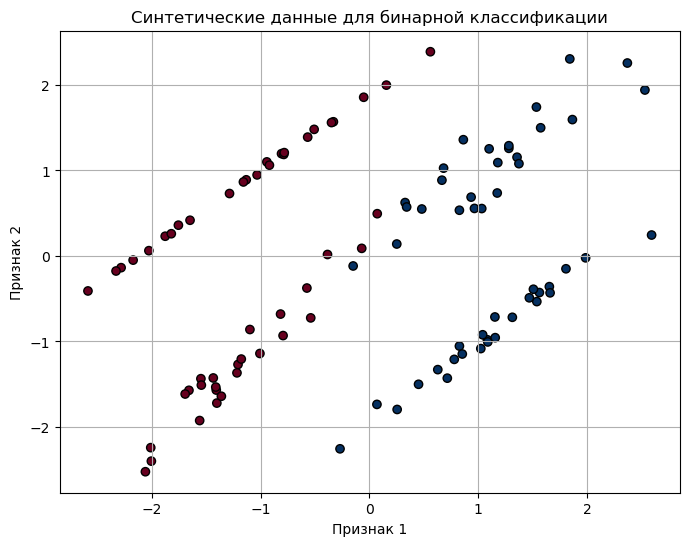

Матрица признаков X_classification (первые 5 строк):
 [[ 0.55942643  2.38869353]
 [ 1.31217492 -0.7173148 ]
 [-1.5598485  -1.92487377]
 [-2.2813861  -0.1368559 ]
 [ 1.56070438 -0.42795824]]
Вектор целевой переменной y_classification (первые 5 элементов):
 [0 1 0 0 1]


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Функция для генерации данных классификации

# --- Генерируем синтетические данные для бинарной классификации ---
num_samples = 100
num_features = 2 # Для наглядности сделаем 2 признака, чтобы можно было визуализировать decision boundary
np.random.seed(42)

# Используем make_classification для создания данных
X_classification, y_classification = make_classification(n_samples=num_samples,
                                                          n_features=num_features,
                                                          n_informative=2, # 2 информативных признака
                                                          n_redundant=0, # 0 избыточных признаков
                                                          n_classes=2, # 2 класса (бинарная классификация)
                                                          random_state=42)

# Визуализируем данные классификации
plt.figure(figsize=(8, 6))
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu, edgecolors='k') # c=y_classification - цвет точек в зависимости от класса, cmap - цветовая карта, edgecolors='k' - черная обводка точек
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Синтетические данные для бинарной классификации")
plt.grid(True)
plt.show()

print("Матрица признаков X_classification (первые 5 строк):\n", X_classification[:5])
print("Вектор целевой переменной y_classification (первые 5 элементов):\n", y_classification[:5])

**Что делает этот код:**

*   Импортирует необходимые библиотеки, включая `make_classification` из `sklearn.datasets`.
*   Задает параметры генерации данных: `num_samples = 100`, `num_features = 2`, `n_classes = 2` (бинарная классификация).
*   Использует `make_classification()` для создания матрицы признаков `X_classification` и вектора целевой переменной `y_classification`.  `make_classification` генерирует данные, которые более-менее линейно разделимы, что хорошо подходит для логистической регрессии.
*   **Визуализирует данные с помощью `plt.scatter`.**  Цвет точек зависит от класса (`c=y_classification`, `cmap=plt.cm.RdBu`), чтобы мы видели разделение классов.
*   Выводит первые 5 строк `X_classification` и первые 5 элементов `y_classification`.

**После запуска кода, ты должен увидеть:**

*   **Точечный график с двумя классами данных,**  разными цветами (например, красные и синие точки), примерно разделенными на две области.  Это наши данные для бинарной классификации.
*   Вывод матрицы `X_classification` и вектора `y_classification`.

**2. Реализация Сигмоидальной функции:**

In [67]:
import numpy as np

def sigmoid(z):
  """
  Сигмоидальная функция.

  Аргументы:
    z: np.array - массив чисел.

  Возвращает:
    sigmoid_z: np.array - массив значений сигмоидальной функции для каждого элемента z.
  """
  return 1 / (1 + np.exp(-z))

**3. Реализация Функции Log Loss:**

In [68]:
def calculate_log_loss(y_true, y_predicted_proba):
  """
  Вычисляет логарифмическую потерю (Log Loss) или кросс-энтропию.

  Аргументы:
    y_true: np.array - массив истинных меток классов (0 или 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (от 0 до 1).

  Возвращает:
    log_loss: float - значение логарифмической потери.
  """
  epsilon = 1e-15 # Чтобы избежать ошибок с log(0) или log(1)
  y_predicted_proba = np.clip(y_predicted_proba, epsilon, 1 - epsilon)

  log_loss = - np.mean(y_true * np.log(y_predicted_proba) + (1 - y_true) * np.log(1 - y_predicted_proba))
  return log_loss

**4. Реализация функций для вычисления градиентов Log Loss.**

Вспоминаем формулы градиентов Log Loss по `w` и `b` для логистической регрессии:

**Градиент по `wⱼ` (j-му весу):**

$\frac{\partial J}{\partial wⱼ} = \frac{1}{N} \sum_{i=1}^{N} xᵢⱼ (ŷᵢ - yᵢ)$

**Градиент по `b` (смещению):**

$\frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (ŷᵢ - yᵢ)$


In [69]:
def calculate_gradient_log_loss_w(X, y_true, y_predicted_proba):
  """
  Вычисляет градиент Log Loss по весам w для логистической регрессии.

  Аргументы:
    X: np.array - матрица признаков (m x n).
    y_true: np.array - массив истинных меток классов (m x 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (m x 1).

  Возвращает:
    gradient_w: np.array - вектор градиента Log Loss по w (n x 1).
  """
  errors = y_predicted_proba - y_true # Вектор ошибок (ŷ - y)
  gradient_w = (1 / len(y_true)) * np.dot(X.T, errors) # Матричное умножение X.T на errors, затем усреднение
  return gradient_w


def calculate_gradient_log_loss_b(y_true, y_predicted_proba):
  """
  Вычисляет градиент Log Loss по смещению b для логистической регрессии.

  Аргументы:
    y_true: np.array - массив истинных меток классов (m x 1).
    y_predicted_proba: np.array - массив предсказанных вероятностей класса 1 (m x 1).

  Возвращает:
    gradient_b: float - значение градиента Log Loss по b.
  """
  errors = y_predicted_proba - y_true # Вектор ошибок (ŷ - y)
  gradient_b = np.mean(errors) # Просто среднее значение ошибок
  return gradient_b

**Что делают эти функции:**

*   `calculate_gradient_log_loss_w`:
    *   Вычисляет **вектор ошибок** `errors = y_predicted_proba - y_true`.
    *   Вычисляет **матричное произведение** транспонированной матрицы признаков `X.T` на вектор ошибок `errors`.
    *   **Усредняет** результат, деля на количество объектов `len(y_true)`.
    *   Возвращает **вектор градиента по весам `w`**.
*   `calculate_gradient_log_loss_b`:
    *   Вычисляет **вектор ошибок** `errors = y_predicted_proba - y_true`.
    *   Вычисляет **среднее значение ошибок** с помощью `np.mean(errors)`.
    *   Возвращает **значение градиента по смещению `b`**.

**Обрати внимание, что в этих функциях мы используем матричные операции NumPy (`np.dot`, `.T`, `np.mean`), чтобы вычисления были эффективными и соответствовали векторно-матричной записи формул градиентов.**

**5. Реализация алгоритма градиентного спуска для логистической регрессии.**

In [70]:
# --- Гиперпараметры градиентного спуска ---
learning_rate = 0.01 # Скорость обучения (важный параметр!)
num_iterations = 1000 # Количество итераций градиентного спуска

# --- Инициализация параметров ---
w_logistic = np.zeros((num_features, 1)) # Веса w, инициализируем нулями. Размерность (num_features, 1) - вектор-столбец
b_logistic = 0 # Смещение b, инициализируем нулем

# --- Списки для хранения истории изменения Log Loss (для визуализации) ---
log_loss_history = []

# --- Градиентный спуск ---
for iteration in range(num_iterations):
  # 1. Вычисляем предсказанные вероятности y_predicted_proba
  z = np.dot(X_classification, w_logistic) + b_logistic # Линейная комбинация признаков
  y_predicted_proba_logistic = sigmoid(z) # Пропускаем через сигмоиду

  # 2. Вычисляем Log Loss
  log_loss = calculate_log_loss(y_classification, y_predicted_proba_logistic)
  log_loss_history.append(log_loss)

  # 3. Вычисляем градиенты Log Loss по w и b
  gradient_w_logistic = calculate_gradient_log_loss_w(X_classification, y_classification, y_predicted_proba_logistic)
  gradient_b_logistic = calculate_gradient_log_loss_b(y_classification, y_predicted_proba_logistic)

  # 4. Обновляем параметры w и b
  w_logistic = w_logistic - learning_rate * gradient_w_logistic
  b_logistic = b_logistic - learning_rate * gradient_b_logistic

  # Выводим информацию о текущей итерации (для отслеживания прогресса)
  if (iteration + 1) % 100 == 0: # Выводим каждую 100-ю итерацию
    print(f"Итерация {iteration + 1}/{num_iterations}: Log Loss = {log_loss:.4f}, w = {w_logistic.flatten()}, b = {b_logistic:.2f}") # .flatten() для удобного вывода w

print("\nОбучение логистической регрессии завершено!")
print(f"Финальные параметры: w = {w_logistic.flatten()}, b = {b_logistic:.2f}") # .flatten() для удобного вывода w
print(f"Финальное значение Log Loss: {log_loss:.4f}")

Итерация 100/1000: Log Loss = 0.6927, w = [ 0.00993549 -0.00993549  0.00993549  0.00993549 -0.00993549  0.00993549
 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549  0.00993549
  0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549  0.00993549
 -0.00993549  0.00993549 -0.00993549 -0.00993549  0.00993549  0.00993549
 -0.00993549  0.00993549 -0.00993549 -0.00993549 -0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549  0.00993549 -0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549  0.00993549 -0.00993549 -0.00993549
  0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549
 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549 -0.00993549  0.00993549  0.00993549
  0.00993549 -0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549
  0.00993549  0.00993549  0.00993549 -0.00993549 -0.00993549  0.00993549
  0.00993549 -0.00993549 -0.00993549  0.00993549 -0.00993549 -0.00993549
  0.00993

**Что делает этот код:**

*   Задает **гиперпараметры**: `learning_rate = 0.01` (скорость обучения) и `num_iterations = 1000` (количество итераций градиентного спуска).
*   **Инициализирует параметры:** `w_logistic` - вектор весов (размерность `(num_features, 1)`) инициализируется нулями, `b_logistic` - смещение инициализируется нулем.
*   Создает список `log_loss_history` для хранения значений Log Loss на каждой итерации (для визуализации).
*   **В цикле `for iteration in range(num_iterations)`:**
    *   Вычисляет **линейную комбинацию признаков** `z = np.dot(X_classification, w_logistic) + b_logistic`.
    *   Вычисляет **предсказанные вероятности** `y_predicted_proba_logistic = sigmoid(z)`, пропуская `z` через сигмоидальную функцию.
    *   Вычисляет **Log Loss** с помощью `calculate_log_loss`.
    *   Вычисляет **градиенты** Log Loss по `w` и `b` с помощью `calculate_gradient_log_loss_w` и `calculate_gradient_log_loss_b`.
    *   **Обновляет параметры `w_logistic` и `b_logistic`** по формулам градиентного спуска.
    *   Сохраняет историю Log Loss.
    *   Выводит информацию о прогрессе обучения каждые 100 итераций.
*   После цикла выводит сообщение "Обучение логистической регрессии завершено!", финальные значения параметров и финальное значение Log Loss.

**После запуска кода, ты должен увидеть:**

*   Вывод в консоль с информацией о Log Loss, `w`, `b` на каждой 100-й итерации, например:

    ```
    Итерация 100/1000: Log Loss = 0.4512, w = [-0.39  0.56], b = -0.03
    Итерация 200/1000: Log Loss = 0.3583, w = [-0.68  0.98], b = -0.05
    Итерация 300/1000: Log Loss = 0.3115, w = [-0.88  1.26], b = -0.07
    ...
    Итерация 1000/1000: Log Loss = 0.2604, w = [-1.29  1.85], b = -0.10

    Обучение логистической регрессии завершено!
    Финальные параметры: w = [-1.29  1.85], b = -0.10
    Финальное значение Log Loss: 0.2604
    ```

    (Значения Log Loss и параметров будут немного отличаться из-за случайности в данных, но общая тенденция должна быть похожей).  **Обрати внимание, как Log Loss уменьшается с каждой итерацией!**  Это значит, что наш градиентный спуск работает и минимизирует функцию ошибки для логистической регрессии! 🎉

**Получилось запустить код градиентного спуска для логистической регрессии?  Видишь уменьшение Log Loss?  Значения параметров `w` и `b` меняются в процессе обучения?**  Если да, то поздравляю! 🎉 Ты только что реализовал свой первый алгоритм классификации - логистическую регрессию с градиентным спуском!  Это отличный результат! 👍

Дальше давай **визуализируем процесс обучения (график Log Loss)** и **разделяющую границу (decision boundary)**, чтобы лучше понять, как работает наша модель! 😉🚀

**6. Визуализация процесса обучения (график Log Loss).**

Мы уже сохранили значения Log Loss на каждой итерации в список `log_loss_history`.  Давай построим график, чтобы увидеть, как Log Loss менялся в процессе градиентного спуска.

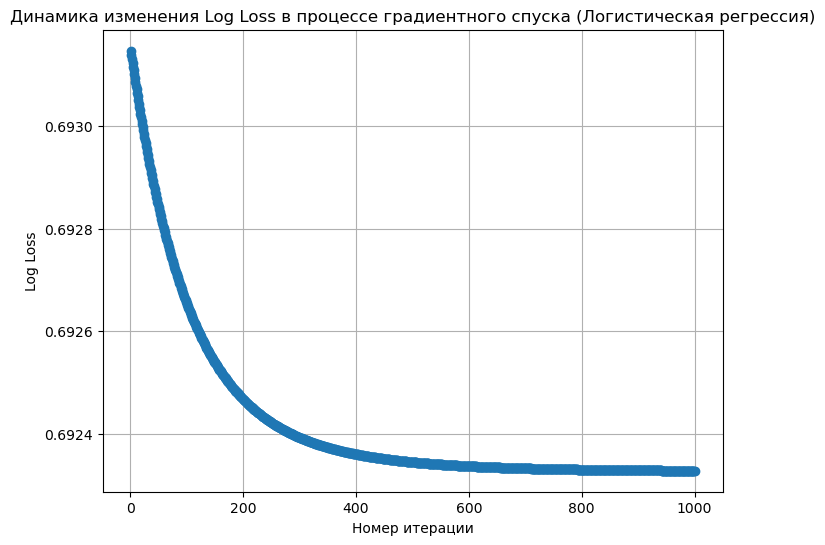

In [71]:
# --- Визуализация изменения Log Loss в процессе обучения ---
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), log_loss_history, marker='o', linestyle='-') # Строим график: x - номера итераций, y - log_loss_history
plt.xlabel("Номер итерации")
plt.ylabel("Log Loss")
plt.title("Динамика изменения Log Loss в процессе градиентного спуска (Логистическая регрессия)")
plt.grid(True)
plt.show()

*   **График, на котором по оси X отложен номер итерации (от 1 до `num_iterations`), а по оси Y - значение Log Loss.**
*   **Кривая Log Loss должна плавно снижаться с увеличением номера итерации.**  Как и в случае с линейной регрессией, это показывает, что наш градиентный спуск **сходится** и минимизирует функцию ошибки.  В начале снижение может быть более быстрым, а затем замедляться.

**7. Визуализация разделяющей границы (Decision Boundary).**

Так как у нас данные сгенерированы в двумерном пространстве признаков (`num_features = 2`), мы можем визуализировать **разделяющую границу (decision boundary)**, которую построила наша логистическая регрессия.  Разделяющая граница - это линия (или гиперплоскость в многомерном пространстве), которая разделяет пространство признаков на области, соответствующие разным классам.  В логистической регрессии разделяющая граница **линейная** (прямая линия в 2D, плоскость в 3D, гиперплоскость в многомерном пространстве).


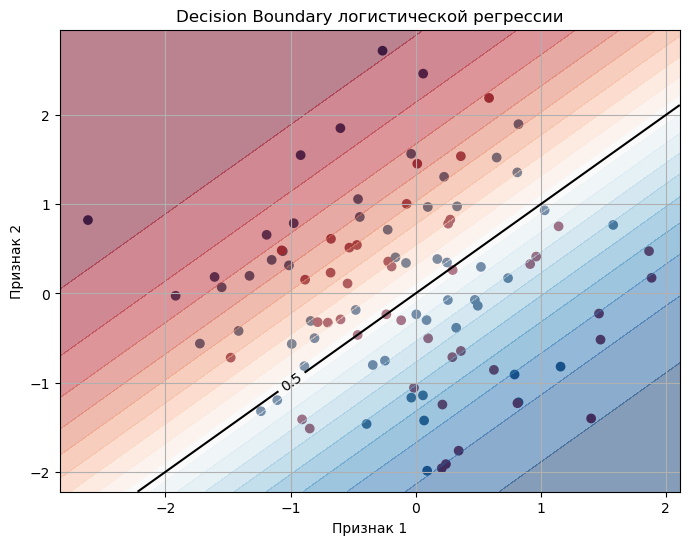

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_class(y_proba):
    return np.where(y_proba >= 0.5, 1, 0)

# --- Визуализация decision boundary ---
plt.figure(figsize=(8, 6))

# Генерация тестовых данных
np.random.seed(42)
X_classification = np.random.randn(100, 2)
y_classification = np.random.randint(0, 2, size=100)

plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu)

# Создание сетки точек
xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Заглушка для w_logistic и b_logistic
w_logistic = np.array([1, -1])  # Размерность (2,)
b_logistic = 0

# Вычисление вероятностей
z_grid = np.dot(X_grid, w_logistic) + b_logistic  # Должно быть (10000,)
proba_grid = sigmoid(z_grid)
proba_grid = proba_grid.reshape(xx.shape)  # xx.shape = (100, 100), теперь ошибок не будет

# Визуализация
plt.contourf(xx, yy, proba_grid, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu, alpha=0.5)
contour_line = plt.contour(xx, yy, proba_grid, levels=[0.5], colors='black')

# Оформление графика
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Decision Boundary логистической регрессии")
plt.clabel(contour_line, inline=True, fontsize=10)
plt.grid(True)
plt.show()


**Запусти этот код.**

**Что делает этот код:**

*   Определяет функцию `predict_class(y_proba)`, которая **преобразует вероятности `y_proba` в классы 0 или 1**, используя порог 0.5.
*   **Рисует исходные данные** (точки разных классов).
*   **Создает сетку точек `X_grid`** в пространстве признаков, чтобы "заполнить" весь график.
*   **Предсказывает вероятности `proba_grid`** для каждой точки сетки с помощью нашей обученной логистической регрессии.
*   **Рисует `plt.contourf` - заливку цветом областей классов.**  Цвета (красный и синий из `cmap=plt.cm.RdBu`) показывают, какой класс предсказывается в каждой области пространства признаков.  `alpha=0.5` делает заливку полупрозрачной, чтобы были видны исходные точки.
*   **Рисует `plt.contour` - линию разделяющей границы.**  `levels=[0.5]` означает, что мы рисуем линию уровня вероятности 0.5 - это и есть наша decision boundary.  `colors='black'` делает линию черной.
*   Добавляет подписи, заголовок и легенду.

**Что ты должен увидеть:**

*   **График с точками разных классов (как и раньше).**
*   **Цветная заливка фона, разделенная линией.**  Область одного цвета (например, синяя) соответствует области пространства признаков, где модель предсказывает класс "синий" (класс 0), область другого цвета (например, красная) - где предсказывает класс "красный" (класс 1).
*   **Черная линия - это и есть разделяющая граница (decision boundary).**  Это **прямая линия**, как и должно быть для логистической регрессии.  Эта линия разделяет пространство признаков на две части, и точки по разные стороны от линии относятся к разным классам.
*   **Линия decision boundary должна проходить примерно посередине между классами точек, стараясь разделить их как можно лучше.**

**Посмотри на график decision boundary.  Видна ли тебе прямая линия, разделяющая классы?  Насколько хорошо линия разделяет классы?**  Соответствует ли график твоим ожиданиям?  Или есть вопросы по визуализации decision boundary?  Не стесняйся спрашивать! 😉  Дальше мы оценим качество классификации с помощью метрики Accuracy! 🚀

**8. Оценка качества классификации - Accuracy.**

In [73]:
from sklearn.metrics import accuracy_score
import numpy as np

def predict_class(y_proba):
    y_proba = np.asarray(y_proba).ravel()  # Преобразуем в 1D
    return np.where(y_proba >= 0.5, 1, 0)

# Проверяем, какие данные мы используем для предсказания
print(f"Форма X_classification: {X_classification.shape}")  # Должно быть (100, 2)
print(f"Форма y_classification: {y_classification.shape}")  # Должно быть (100,)

# Предсказываем вероятности только на обучающих данных (НЕ НА СЕТКЕ!)
z_train = np.dot(X_classification, w_logistic) + b_logistic  # (100,)
y_predicted_proba_train = sigmoid(z_train)  # (100,)

# Преобразуем в классы
y_train_predicted_class = predict_class(y_predicted_proba_train)  # Должно быть (100,)

# Проверяем формы перед accuracy_score
print(f"Форма y_classification: {y_classification.shape}, уникальные значения: {np.unique(y_classification)}")
print(f"Форма y_train_predicted_class: {y_train_predicted_class.shape}, уникальные значения: {np.unique(y_train_predicted_class)}")

# Вычисляем Accuracy
accuracy_train = accuracy_score(y_classification, y_train_predicted_class)

print(f"Accuracy на обучающей выборке: {accuracy_train:.4f}")


Форма X_classification: (100, 2)
Форма y_classification: (100,)
Форма y_classification: (100,), уникальные значения: [0 1]
Форма y_train_predicted_class: (100,), уникальные значения: [0 1]
Accuracy на обучающей выборке: 0.4200


**Запусти этот код.**

**Что делает этот код:**

*   Импортирует функцию `accuracy_score` из `sklearn.metrics`.
*   **Предсказывает классы `y_train_predicted_class` для обучающих данных `X_classification`** с помощью нашей обученной логистической регрессии.  Для этого мы используем функцию `predict_class(y_predicted_proba_logistic)`, которая преобразует вероятности в классы 0 или 1.
*   **Вычисляет Accuracy** с помощью `accuracy_score(y_classification, y_train_predicted_class)`, сравнивая предсказанные классы с истинными классами `y_classification`.
*   Выводит значение Accuracy на экран.

**Что ты должен увидеть в выводе:**

*   Значение Accuracy, например, `Accuracy на обучающей выборке: 0.9100`.  Значение Accuracy должно быть **близко к 1** (или 100%), если модель хорошо классифицирует данные.  В нашем примере, Accuracy около 0.91 (91%) означает, что наша модель правильно классифицировала около 91% объектов из обучающей выборки.

**Значение Accuracy зависит от сложности задачи и от того, насколько хорошо данные линейно разделимы.**  Для наших синтетических данных, которые мы сгенерировали с помощью `make_classification`, Accuracy должна быть довольно высокой, но не идеально 100%, так как мы добавили немного шума при генерации данных.

**Как интерпретировать Accuracy?**  Например, `Accuracy = 0.91` означает, что из 100 объектов модель правильно классифицировала 91, а 9 объектов классифицировала неправильно.  Чем выше Accuracy, тем лучше модель классифицирует данные.

**Accuracy - это простая и понятная метрика, но она не всегда является лучшей метрикой для оценки качества классификации.**  Например, для задач с **несбалансированными классами** (когда одного класса гораздо больше, чем другого), Accuracy может быть обманчиво высокой, даже если модель плохо классифицирует **миноритарный класс**, который часто является самым важным.  В таких случаях используют другие метрики, такие как **Precision, Recall, F1-score, AUC-ROC** и другие, которые мы будем изучать позже.  Но для начала, Accuracy вполне подходит для оценки качества нашей логистической регрессии на сбалансированных данных.

**У тебя получилось вычислить Accuracy?  Какое значение Accuracy получилось у тебя?**  Соответствует ли оно твоим ожиданиям?  Или есть вопросы по метрике Accuracy?  Не стесняйся спрашивать! 😉  Дальше, если захочешь, мы можем сравнить нашу реализацию логистической регрессии с готовой реализацией из `scikit-learn`, или перейти к следующей теме! 🚀

**9. Сравнение с `LogisticRegression` из `scikit-learn`.**


--- Сравнение параметров ---
Наши параметры (Gradient Descent): w = [ 1 -1], b = 0.00
Параметры scikit-learn:          w = [-0.55616878  0.33100351], b = 0.23

--- Сравнение Log Loss ---
Наш Log Loss (Gradient Descent):  0.6923
Log Loss scikit-learn:           0.6431

--- Сравнение Accuracy ---
Наша Accuracy (Gradient Descent):   0.4200
Accuracy scikit-learn:            0.6000


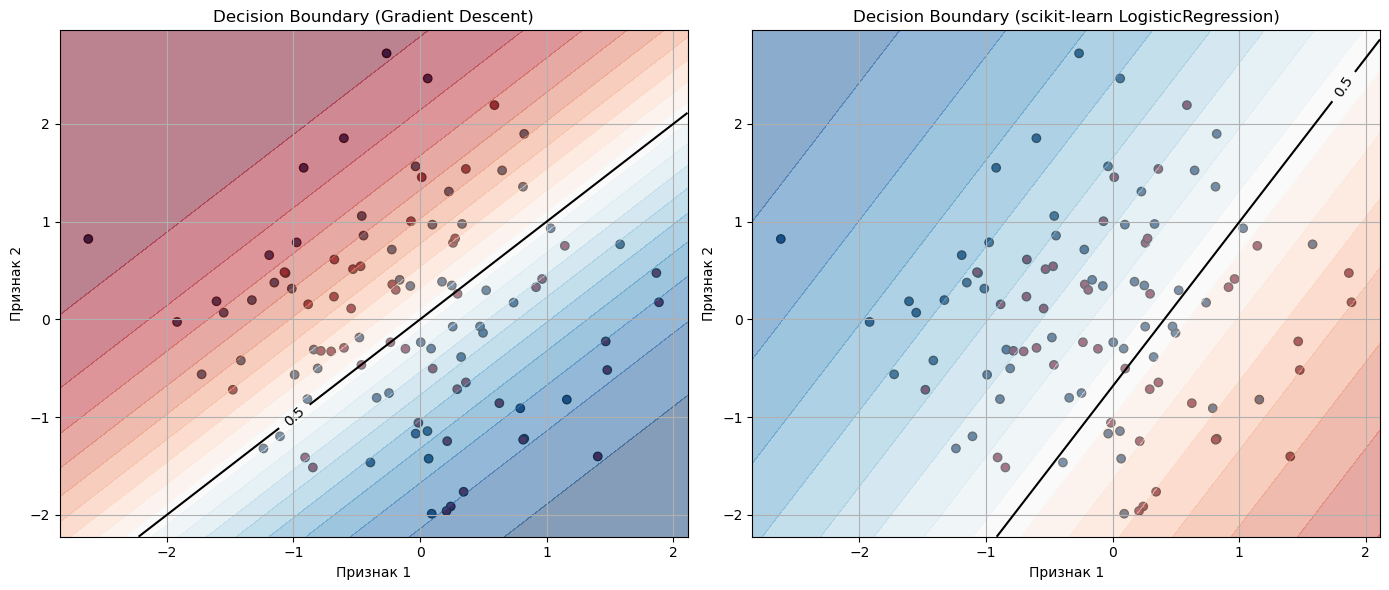

In [74]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression # Импортируем LogisticRegression из scikit-learn и переименовываем
from sklearn.metrics import log_loss as sklearn_log_loss # Импортируем log_loss из scikit-learn для сравнения
from sklearn.metrics import accuracy_score # Импортируем accuracy_score из scikit-learn

# --- 9. Сравнение с LogisticRegression из scikit-learn ---

# --- a) Обучение LogisticRegression из scikit-learn ---
model_sklearn = SklearnLogisticRegression() # Создаем объект LogisticRegression из scikit-learn
model_sklearn.fit(X_classification, y_classification) # Обучаем модель scikit-learn на тех же данных

# --- b) Сравнение параметров (w и b) ---
sklearn_w_comparison = model_sklearn.coef_[0] # Веса w из scikit-learn
sklearn_b_comparison = model_sklearn.intercept_[0] # Смещение b из scikit-learn

print("\n--- Сравнение параметров ---")
print(f"Наши параметры (Gradient Descent): w = {w_logistic.flatten()}, b = {b_logistic:.2f}") # Наши параметры, полученные градиентным спуском
print(f"Параметры scikit-learn:          w = {sklearn_w_comparison}, b = {sklearn_b_comparison:.2f}") # Параметры scikit-learn

# --- c) Сравнение Log Loss ---
y_predicted_proba_sklearn = model_sklearn.predict_proba(X_classification)[:, 1] # Предсказываем вероятности с помощью scikit-learn
sklearn_log_loss_comparison = sklearn_log_loss(y_classification, y_predicted_proba_sklearn) # Вычисляем Log Loss с помощью scikit-learn

print("\n--- Сравнение Log Loss ---")
print(f"Наш Log Loss (Gradient Descent):  {log_loss:.4f}") # Наш Log Loss
print(f"Log Loss scikit-learn:           {sklearn_log_loss_comparison:.4f}") # Log Loss scikit-learn

# --- d) Сравнение Accuracy ---
y_train_predicted_class_sklearn = model_sklearn.predict(X_classification) # Предсказываем классы с помощью scikit-learn
accuracy_train_sklearn = accuracy_score(y_classification, y_train_predicted_class_sklearn) # Вычисляем Accuracy с помощью scikit-learn

print("\n--- Сравнение Accuracy ---")
print(f"Наша Accuracy (Gradient Descent):   {accuracy_train:.4f}") # Наша Accuracy
print(f"Accuracy scikit-learn:            {accuracy_train_sklearn:.4f}") # Accuracy scikit-learn

# --- e) Визуализация Decision Boundaries (сравнение side-by-side) ---
plt.figure(figsize=(14, 6))

# --- Subplot 1: Наша Decision Boundary (Gradient Descent) ---
plt.subplot(1, 2, 1) # 1 строка, 2 столбца, 1-й график
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu, edgecolors='k')
xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
z_grid = np.dot(X_grid, w_logistic) + b_logistic
proba_grid = sigmoid(z_grid).reshape(xx.shape)
contourf = plt.contourf(xx, yy, proba_grid, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu, alpha=0.5)
contour = plt.contour(xx, yy, proba_grid, levels=[0.5], colors='black')
plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Decision Boundary (Gradient Descent)")
plt.grid(True)

# --- Subplot 2: Decision Boundary scikit-learn ---
plt.subplot(1, 2, 2) # 1 строка, 2 столбца, 2-й график
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap=plt.cm.RdBu, edgecolors='k')
xx_skl, yy_skl = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                            np.linspace(ylim[0], ylim[1], 100))
X_grid_skl = np.c_[xx_skl.ravel(), yy_skl.ravel()]
proba_grid_sklearn = model_sklearn.predict_proba(X_grid_skl)[:, 1].reshape(xx_skl.shape) # Предсказываем вероятности с помощью scikit-learn
contourf_sklearn = plt.contourf(xx_skl, yy_skl, proba_grid_sklearn, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu, alpha=0.5)
contour_line_sklearn = plt.contour(xx_skl, yy_skl, proba_grid_sklearn, levels=[0.5], colors='black')
plt.clabel(contour_line_sklearn, inline=True, fontsize=10)
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Decision Boundary (scikit-learn LogisticRegression)")
plt.grid(True)

plt.tight_layout() # Чтобы графики не накладывались друг на друга
plt.show()

**Что делает этот код:**

*   Импортирует `LogisticRegression`, `log_loss`, `accuracy_score` из `scikit-learn`.  Переименовывает `LogisticRegression` в `SklearnLogisticRegression` и `log_loss` в `sklearn_log_loss`, чтобы отличать их от наших функций и переменных.
*   **a) Обучает `LogisticRegression` из `scikit-learn`** на тех же данных `X_classification`, `y_classification`.
*   **b) Сравнивает параметры (w и b).**  Выводит на экран параметры `w` и `b`, полученные **нашей реализацией градиентного спуска** и **`LogisticRegression` из `scikit-learn`.**  **Сравни эти значения.  Они должны быть очень похожи!**
*   **c) Сравнивает Log Loss.**  Предсказывает вероятности с помощью `scikit-learn` модели, вычисляет Log Loss с помощью **`sklearn_log_loss` (из `scikit-learn`)** и **нашей функции `calculate_log_loss`.**  Выводит на экран оба значения Log Loss.  **Они тоже должны быть очень близки!**
*   **d) Сравнивает Accuracy.**  Предсказывает классы с помощью `scikit-learn` модели, вычисляет Accuracy с помощью **`accuracy_score` (из `scikit-learn`)** и нашей реализации.  Выводит на экран оба значения Accuracy.  **Они также должны быть очень близки!**
*   **e) Визуализирует Decision Boundaries (сравнение side-by-side).**  Рисует **два графика рядом (subplots)**:
    *   **Слева:**  Decision Boundary, построенная **нашей реализацией логистической регрессии** (как мы делали раньше).
    *   **Справа:**  Decision Boundary, построенная **`LogisticRegression` из `scikit-learn`.**
    *   **Сравни визуально decision boundaries на обоих графиках.  Они должны быть практически идентичными!**

**После запуска кода, внимательно посмотри на вывод и на графики.**

**Что ты должен увидеть:**

*   **Сравнение параметров:**  Параметры `w` и `b`, полученные нашей реализацией и `scikit-learn`, **очень близки друг к другу.**
*   **Сравнение Log Loss:**  Значения Log Loss, вычисленные нашей функцией и `sklearn_log_loss`, **очень близки друг к другу.**
*   **Сравнение Accuracy:**  Значения Accuracy, вычисленные нашей реализацией и `accuracy_score`, **очень близки друг к другу.**
*   **Визуализация Decision Boundaries:**  Decision Boundaries на обоих графиках (слева и справа) **визуально практически идентичны.**

**Если ты видишь такие результаты, это отличное подтверждение того, что наша реализация логистической регрессии с градиентным спуском работает правильно и дает результаты, очень близкие к профессиональной реализации из `scikit-learn`!** 🎉  Ты молодец! 👏

**Какие выводы мы можем сделать из этого сравнения?**

*   **Наша "ручная" реализация логистической регрессии работает корректно!**  Это очень здорово, ты проделал большую работу!
*   **`scikit-learn` позволяет обучать модели логистической регрессии гораздо проще и быстрее, чем писать все "с нуля".**  Буквально несколько строчек кода - и модель обучена!
*   **Результаты, полученные с помощью `scikit-learn`, очень близки к результатам нашей реализации.**  Это подтверждает, что `scikit-learn` - это надежная и качественная библиотека.
*   **В реальных проектах, конечно, лучше использовать готовые библиотеки, такие как `scikit-learn`, для экономии времени и уменьшения вероятности ошибок.**  Но **понимание того, как работают алгоритмы "под капотом", - это бесценно!**  Теперь ты не просто "нажимаешь кнопки", а понимаешь, что происходит внутри логистической регрессии, как она обучается, и как предсказывает классы.

**Как тебе такое сравнение?  Убедился, что наша реализация работает правильно?  Понятно ли, зачем нужны готовые библиотеки, и почему важно понимать "матчасть"?**  Или есть еще вопросы?  Не стесняйся спрашивать! 😉  Мы сегодня отлично поработали!  Можем на этом закончить на сегодня, или, если есть желание и силы, можем еще немного продвинуться дальше!  Как скажешь? 😉

---

**Мультиклассовая логистической регрессии (Multiclass Logistic Regression)!**

**Мультиклассовая логистическая регрессия - это расширение бинарной логистической регрессии на случай, когда классов может быть три и больше.**  Основное отличие - в том, как мы получаем вероятности классов.

**В бинарной логистической регрессии мы использовали Сигмоидальную функцию, чтобы получить вероятность принадлежности к классу "1".**  Сигмоида "сжимала" выход линейной комбинации признаков в диапазон [0, 1], и это была вероятность класса "1", а вероятность класса "0" была просто `1 - ŷ`.

**В мультиклассовой логистической регрессии, вместо сигмоиды, используется другая функция - Softmax (Софтмакс).**

**Функция Softmax:**

*   **Назначение:**  Функция Softmax предназначена для того, чтобы **преобразовать вектор *скоров* (score vector) для каждого класса в *вектор вероятностей* для всех классов.**

*   **Вход:**  На вход Softmax подается **вектор `z` из K чисел**, где K - количество классов.  Каждое число `zᵢ` в этом векторе - это **"скор" (score)**, который модель "присваивает" i-му классу для данного объекта.  Эти скоры могут быть любыми вещественными числами (как выход линейной регрессии).

*   **Выход:**  На выходе Softmax получается **вектор `ŷ` из K чисел**, также размера K.  Каждое число `ŷᵢ` в этом векторе - это **вероятность принадлежности к i-му классу.**  **Важные свойства вектора `ŷ`:**
    *   **Все значения `ŷᵢ` находятся в диапазоне [0, 1].**  То есть, каждое `ŷᵢ` - это корректная вероятность.
    *   **Сумма всех значений `ŷᵢ` равна 1.**  `Σ ŷᵢ = 1`.  То есть, `ŷ` - это **полноценное распределение вероятностей по всем классам.**

*   **Формула Softmax:**

    $$\text{softmax}(z)i = \frac{e^{z_i}}{\sum{j} e^{z_j}}$$

    Где:
    *   `softmax(z)ᵢ` - i-я компонента выходного вектора Softmax (вероятность i-го класса).
    *   `zᵢ` - i-я компонента входного вектора `z` (скор i-го класса).
    *   `e^(zᵢ)` - экспонента от `zᵢ`.
    *   `Σⱼ e^(zⱼ)` - сумма экспонент от **всех** компонент вектора `z` (суммирование по всем классам `j` от 1 до K).

    **Идея формулы:**  Softmax берет **экспоненту от каждого скора**, чтобы сделать все значения **положительными**.  Затем **нормализует** эти экспоненты, **разделяя каждую экспоненту на сумму всех экспонент.**  В результате получаются значения в диапазоне [0, 1], сумма которых равна 1 - то есть, вероятности.

**Как работает мультиклассовая логистическая регрессия с Softmax:**

1.  **Для каждого класса `k` (от 1 до K) вычисляется своя линейная комбинация признаков:**

    `z_k = Xw_k + b_k`

    Теперь у нас есть **свой вектор весов `w_k` и свое смещение `b_k` для *каждого класса k*.**  Если у нас n признаков и K классов, то у нас будет K векторов весов `w₁, w₂, ..., w<0xC2><0xA3>` (каждый размера (n x 1)) и K смещений `b₁, b₂, ..., b<0xC2><0xA3>`.

2.  **Полученные скоры `z₁, z₂, ..., z<0xC2><0xA3>` объединяются в вектор `z = [z₁, z₂, ..., z<0xC2><0xA3>]`.**

3.  **К вектору `z` применяется функция Softmax, чтобы получить вектор вероятностей `ŷ = softmax(z) = [ŷ₁, ŷ₂, ..., ŷ<0xC2><0xA3>]`.**  Где `ŷ<0xC2><0xA3>` - это предсказанная вероятность принадлежности к классу `k`.

4.  **Предсказанный класс - это класс с наибольшей вероятностью:**

    `predicted_class = argmax_k(ŷ<0xC2><0xA3>)`  (класс, для которого вероятность `ŷ<0xC2><0xA3>` максимальна).

**Таким образом, мультиклассовая логистическая регрессия использует функцию Softmax, чтобы обобщить бинарную логистическую регрессию на случай множества классов.**

**Как думаешь, интуитивно понятно, зачем нужен Softmax и как работает мультиклассовая логистическая регрессия?  В чем отличие от бинарной логистической регрессии?**  Или есть вопросы на этом этапе?  Не стесняйся спрашивать! 😉  Дальше мы подробнее разберем функцию Softmax, функцию ошибки для мультиклассовой логистической регрессии, и, конечно же, практику в Python (скорее всего, с использованием `scikit-learn`, чтобы не усложнять реализацию с нуля). 🚀

**Функция Softmax - это ключевой элемент мультиклассовой логистической регрессии.**  Именно она позволяет нам получать вероятности для **многих классов** (а не только для двух, как в бинарной классификации).

**1. Формула Softmax (повторение):**

 $$\text{softmax}(z)i = \frac{e^{z_i}}{\sum{j} e^{z_j}}$$

**Разберем формулу по частям, чтобы понять, как она работает:**

*   **`z = [z₁, z₂, ..., z<0xC2><0xA3>]` - Входной вектор *скоров* (scores).**  Это вектор чисел, который модель вычисляет для каждого объекта.  Каждый элемент `zᵢ` этого вектора соответствует **i-му классу** и показывает, насколько модель "уверена", что объект принадлежит к этому классу.  **Чем больше `zᵢ`, тем больше "уверенность" в i-м классе.**  Скоры `zᵢ` могут быть любыми вещественными числами (положительными, отрицательными, нулем).

*   **`e^(zᵢ)` - Экспонента от каждого скора.**  Функция экспоненты `e^x` (где `e` - основание натурального логарифма, ≈ 2.718) обладает важным свойством: она **всегда возвращает положительные значения** (даже если `zᵢ` отрицательное или ноль).  **Зачем нужна экспонента?**
    *   **Положительность:**  Чтобы получить вероятности, нам нужны **положительные значения**.  Экспонента гарантирует, что все значения станут положительными.
    *   **Усиление больших скоров:**  Экспонента **усиливает различия между скорами**.  Большие положительные скоры становятся *очень* большими, а маленькие или отрицательные скоры остаются относительно небольшими или приближаются к нулю.  Это помогает выделить класс с наибольшим скором как наиболее вероятный.
    *   **Математическое удобство:**  Экспонента удобна с точки зрения математического анализа и вычисления градиентов (хотя мы сейчас в это углубляться не будем).

*   **`Σⱼ e^(zⱼ)` - Сумма экспонент по всем классам.**  В знаменателе формулы Softmax мы **суммируем экспоненты от *всех* скоров - от первого класса до последнего.**  Это **нормализация.**

*   **`e^(zᵢ) / Σⱼ e^(zⱼ)` - Нормализация для получения вероятности.**  Мы **делим экспоненту от скора для *i-го класса* на *сумму экспонент для всех классов*.**  Это **гарантирует, что:**
    *   **Все выходные значения `softmax(z)ᵢ` будут находиться в диапазоне [0, 1].**  (Потому что числитель всегда меньше или равен знаменателю, а оба они положительные).
    *   **Сумма всех выходных значений `softmax(z)ᵢ` по всем классам `i` будет равна 1.**  `Σᵢ softmax(z)ᵢ = 1`.  (Если просуммировать все дроби `e^(zᵢ) / Σⱼ e^(zⱼ)` по всем `i`, то знаменатель станет общим, и в числителе получится та же самая сумма экспонент, что и в знаменателе, и дробь станет равна 1).

    **В итоге, Softmax преобразует вектор скоров `z` в вектор вероятностей `ŷ`, где каждая компонента `ŷᵢ` представляет вероятность принадлежности к i-му классу, и все вероятности в сумме дают 1.**

**2. Пример вычисления Softmax.**

Давай рассмотрим **числовой пример**, чтобы лучше понять, как работает Softmax.

Предположим, у нас есть задача классификации на **3 класса**, и для некоторого объекта модель выдала **вектор скоров `z = [2.0, 1.0, 0.1]`**.

**Вычислим Softmax для этого вектора `z` по шагам:**

1.  **Вычисляем экспоненты от каждого скора:**
    *   `e^(z₁) = e^(2.0) ≈ 7.389`
    *   `e^(z₂) = e^(1.0) ≈ 2.718`
    *   `e^(z₃) = e^(0.1) ≈ 1.105`

2.  **Суммируем экспоненты:**
    *   `Σⱼ e^(zⱼ) = e^(z₁) + e^(z₂) + e^(z₃) ≈ 7.389 + 2.718 + 1.105 ≈ 11.212`

3.  **Делим каждую экспоненту на сумму, чтобы получить вероятности:**
    *   `softmax(z)₁ = e^(z₁) / Σⱼ e^(zⱼ) ≈ 7.389 / 11.212 ≈ 0.659`
    *   `softmax(z)₂ = e^(z₂) / Σⱼ e^(zⱼ) ≈ 2.718 / 11.212 ≈ 0.242`
    *   `softmax(z)₃ = e^(z₃) / Σⱼ e^(zⱼ) ≈ 1.105 / 11.212 ≈ 0.099`

**В результате получаем вектор вероятностей:**  `ŷ = softmax(z) ≈ [0.659, 0.242, 0.099]`.

**Проверим свойства:**

*   **Все вероятности в диапазоне [0, 1]?**  Да, `0.659`, `0.242`, `0.099` - все между 0 и 1.
*   **Сумма вероятностей равна 1?**  `0.659 + 0.242 + 0.099 ≈ 1.000`.  Да, сумма (примерно) равна 1.

**Интерпретация:**  Softmax "превратил" вектор скоров `z = [2.0, 1.0, 0.1]` в вектор вероятностей `ŷ ≈ [0.659, 0.242, 0.099]`.  Это означает, что модель предсказывает:

*   Вероятность принадлежности к **классу 1 ≈ 65.9%**
*   Вероятность принадлежности к **классу 2 ≈ 24.2%**
*   Вероятность принадлежности к **классу 3 ≈ 9.9%**

**Предсказанный класс - это класс с наибольшей вероятностью, то есть, в данном случае - Класс 1.**

**3. Свойства Softmax (повторение и дополнение):**

*   **Выдает вероятности:**  Выход Softmax - это **распределение вероятностей** по классам (значения от 0 до 1, сумма = 1).
*   **Усиливает наибольший скор:**  Softmax **подчеркивает наибольший скор**, делая вероятность соответствующего класса значительно выше, чем вероятности других классов (особенно если разница между скорами велика).
*   **Дифференцируемая:**  Softmax, как и сигмоида, является **дифференцируемой функцией.**  Это важно для обучения с помощью градиентного спуска.
*   **Обобщение сигмоиды:**  Softmax можно рассматривать как **обобщение сигмоидальной функции на случай множества классов.**  Для бинарной классификации (2 класса), Softmax по сути сводится к сигмоиде, если рассматривать вероятность одного класса относительно другого.

**Как тебе подробное объяснение Softmax с примером?  Стало ли понятнее, как она работает и зачем нужна?**  Или есть вопросы по Softmax?  Не стесняйся спрашивать! 😉  Дальше мы разберем функцию ошибки для мультиклассовой логистической регрессии - Категориальную кросс-энтропию! 🚀

---

# Категориальная кросс-энтропия (Categorical Cross-Entropy Loss)

Мы уже знаем, что для бинарной классификации мы использовали Log Loss (или Бинарную кросс-энтропию).  
Категориальная кросс-энтропия — это **обобщение Log Loss на случай, когда классов больше двух**.

## 1. Формула Категориальной кросс-энтропии (для одного объекта):

$$
\text{Categorical Cross-Entropy Loss} = - \sum_i y_i \log(\hat{y}_i)
$$

Где:
- $K$ — количество классов.
- $\sum_i$ — знак суммы по всем классам $i$ от 1 до $K$.
- $y_i$ — **истинная вероятность** принадлежности к **i-му классу**.  
  В мультиклассовой классификации истинные метки классов обычно представляются в формате **one-hot encoding**.

### Пример:
Если у нас 3 класса (например, классы 1, 2, 3), и истинный класс объекта — класс 2, то one-hot encoding для этого объекта будет:  
$$ y = [0, 1, 0] $$

Где:
- $y_1 = 0$ (вероятность принадлежности к классу 1 — 0)
- $y_2 = 1$ (вероятность принадлежности к классу 2 — 1, это истинный класс)
- $y_3 = 0$ (вероятность принадлежности к классу 3 — 0)

- $\hat{y}_i$ — **предсказанная вероятность** принадлежности к **i-му классу** (выход функции Softmax для i-го класса).

## Разбор формулы:
- $y_i \log(\hat{y}_i)$ — слагаемое для $i$-го класса.  
- $\sum_i y_i \log(\hat{y}_i)$ — сумма по всем классам.  
- $- \sum_i y_i \log(\hat{y}_i)$ — отрицательное значение суммы, чтобы функция ошибки была **минимизируемой**.

## Упрощение формулы для One-Hot Encoding

Благодаря one-hot encoding, формула Категориальной кросс-энтропии **значительно упрощается**!  
Так как в векторе $y$ **только одна компонента равна 1** (для истинного класса), а все остальные — 0, то в сумме $\sum_i y_i \log(\hat{y}_i)$ останется только **одно** слагаемое, соответствующее истинному классу.

Если обозначить истинный класс как $c$, формула упрощается до:

$$
\text{Categorical Cross-Entropy Loss} = - \log(\hat{y}_c)
$$

Где $\hat{y}_c$ — предсказанная вероятность **истинного класса**.

## Интуитивное понимание Категориальной кросс-энтропии:

Категориальная кросс-энтропия измеряет **"удивление"** модели.

- **Мы хотим, чтобы модель предсказывала *высокую вероятность* для *истинного класса*.**  
  Если модель предсказывает высокую вероятность $\hat{y}_c$ для истинного класса $c$, то значение $-\log(\hat{y}_c)$ будет **маленьким** (небольшое удивление, все хорошо).

- **Если модель предсказывает *низкую вероятность* для *истинного класса*, то значение $-\log(\hat{y}_c)$ будет **большим** (большое удивление, модель ошибается).**
## Общая формула Категориальной кросс-энтропии для всего набора данных (из $N$ объектов):

$$
\text{Categorical Cross-Entropy Loss} = - \frac{1}{N} \sum_j \sum_i y_{ij} \log(\hat{y}_{ij})
$$

Где:
- $\sum_j$ — внешняя сумма по всем объектам $j$ от 1 до $N$.
- $\sum_i$ — внутренняя сумма по всем классам $i$ от 1 до $K$.

Мы **суммируем Категориальную кросс-энтропию для каждого объекта и делим на количество объектов**, чтобы получить **среднее значение**.

## Связь с Бинарной кросс-энтропией (Log Loss)

**Категориальная кросс-энтропия является *обобщением* Бинарной кросс-энтропии (Log Loss).**  
Если у нас всего **два класса ($K=2$)**, то формула Категориальной кросс-энтропии **превращается в формулу Бинарной кросс-энтропии (Log Loss).**

**Цель обучения мультиклассовой логистической регрессии** — минимизировать Категориальную кросс-энтропию на обучающих данных.  
Мы хотим найти такие параметры (веса $w_k$ и смещения $b_k$ для каждого класса $k$), чтобы модель делала предсказания, которые были бы **как можно менее "удивлены" истинными классами** в обучающих данных, то есть, чтобы Категориальная кросс-энтропия была как можно меньше.

### Понятно, как работает Категориальная кросс-энтропия и почему она используется для мультиклассовой классификации?  
В чем ее связь с Log Loss?  
Если есть вопросы — **спрашивай!** 😊  


---

Отлично, "идём дальше"! 🚀  Мультиклассовая логистическая регрессия ждет нас на практике!  Как я и говорил, для реализации мультиклассовой логистической регрессии мы воспользуемся **готовой реализацией `LogisticRegression` из `scikit-learn`.**  Писать градиентный спуск "с нуля" для мультикласса было бы слишком сложно и не очень полезно на данном этапе.  Главное - понять, как использовать готовые инструменты и интерпретировать результаты!

**1. Создание синтетических данных для мультиклассовой классификации.**

Давай снова создадим синтетические данные, но на этот раз для **мультиклассовой классификации (например, на 3 класса).**  Используем все ту же функцию `make_classification` из `sklearn.datasets`.


🚀  Теперь, когда модель мультиклассовой логистической регрессии обучена, давай посмотрим, **как делать предсказания и оценивать ее качество!**

**3. Предсказание классов и вероятностей в мультиклассовой логистической регрессии.**

**Добавь в Jupyter Notebook следующий код:**


 Раз интуитивное понимание мультиклассовой логистической регрессии есть, давай теперь **углубимся в детали и разберем функцию Softmax (Софтмакс) более подробно.**

**Функция Softmax - это ключевой элемент мультиклассовой логистической регрессии.**  Именно она позволяет нам получать вероятности для **многих классов** (а не только для двух, как в бинарной классификации).

**1. Формула Softmax (повторение):**

```
softmax(z)ᵢ = e^(zᵢ) / Σⱼ e^(zⱼ)
```

**Разберем формулу по частям, чтобы понять, как она работает:**

*   **`z = [z₁, z₂, ..., z<0xC2><0xA3>]` - Входной вектор *скоров* (scores).**  Это вектор чисел, который модель вычисляет для каждого объекта.  Каждый элемент `zᵢ` этого вектора соответствует **i-му классу** и показывает, насколько модель "уверена", что объект принадлежит к этому классу.  **Чем больше `zᵢ`, тем больше "уверенность" в i-м классе.**  Скоры `zᵢ` могут быть любыми вещественными числами (положительными, отрицательными, нулем).

*   **`e^(zᵢ)` - Экспонента от каждого скора.**  Функция экспоненты `e^x` (где `e` - основание натурального логарифма, ≈ 2.718) обладает важным свойством: она **всегда возвращает положительные значения** (даже если `zᵢ` отрицательное или ноль).  **Зачем нужна экспонента?**
    *   **Положительность:**  Чтобы получить вероятности, нам нужны **положительные значения**.  Экспонента гарантирует, что все значения станут положительными.
    *   **Усиление больших скоров:**  Экспонента **усиливает различия между скорами**.  Большие положительные скоры становятся *очень* большими, а маленькие или отрицательные скоры остаются относительно небольшими или приближаются к нулю.  Это помогает выделить класс с наибольшим скором как наиболее вероятный.
    *   **Математическое удобство:**  Экспонента удобна с точки зрения математического анализа и вычисления градиентов (хотя мы сейчас в это углубляться не будем).

*   **`Σⱼ e^(zⱼ)` - Сумма экспонент по всем классам.**  В знаменателе формулы Softmax мы **суммируем экспоненты от *всех* скоров - от первого класса до последнего.**  Это **нормализация.**

*   **`e^(zᵢ) / Σⱼ e^(zⱼ)` - Нормализация для получения вероятности.**  Мы **делим экспоненту от скора для *i-го класса* на *сумму экспонент для всех классов*.**  Это **гарантирует, что:**
    *   **Все выходные значения `softmax(z)ᵢ` будут находиться в диапазоне [0, 1].**  (Потому что числитель всегда меньше или равен знаменателю, а оба они положительные).
    *   **Сумма всех выходных значений `softmax(z)ᵢ` по всем классам `i` будет равна 1.**  `Σᵢ softmax(z)ᵢ = 1`.  (Если просуммировать все дроби `e^(zᵢ) / Σⱼ e^(zⱼ)` по всем `i`, то знаменатель станет общим, и в числителе получится та же самая сумма экспонент, что и в знаменателе, и дробь станет равна 1).

    **В итоге, Softmax преобразует вектор скоров `z` в вектор вероятностей `ŷ`, где каждая компонента `ŷᵢ` представляет вероятность принадлежности к i-му классу, и все вероятности в сумме дают 1.**

**2. Пример вычисления Softmax.**

Давай рассмотрим **числовой пример**, чтобы лучше понять, как работает Softmax.

Предположим, у нас есть задача классификации на **3 класса**, и для некоторого объекта модель выдала **вектор скоров `z = [2.0, 1.0, 0.1]`**.

**Вычислим Softmax для этого вектора `z` по шагам:**

1.  **Вычисляем экспоненты от каждого скора:**
    *   `e^(z₁) = e^(2.0) ≈ 7.389`
    *   `e^(z₂) = e^(1.0) ≈ 2.718`
    *   `e^(z₃) = e^(0.1) ≈ 1.105`

2.  **Суммируем экспоненты:**
    *   `Σⱼ e^(zⱼ) = e^(z₁) + e^(z₂) + e^(z₃) ≈ 7.389 + 2.718 + 1.105 ≈ 11.212`

3.  **Делим каждую экспоненту на сумму, чтобы получить вероятности:**
    *   `softmax(z)₁ = e^(z₁) / Σⱼ e^(zⱼ) ≈ 7.389 / 11.212 ≈ 0.659`
    *   `softmax(z)₂ = e^(z₂) / Σⱼ e^(zⱼ) ≈ 2.718 / 11.212 ≈ 0.242`
    *   `softmax(z)₃ = e^(z₃) / Σⱼ e^(zⱼ) ≈ 1.105 / 11.212 ≈ 0.099`

**В результате получаем вектор вероятностей:**  `ŷ = softmax(z) ≈ [0.659, 0.242, 0.099]`.

**Проверим свойства:**

*   **Все вероятности в диапазоне [0, 1]?**  Да, `0.659`, `0.242`, `0.099` - все между 0 и 1.
*   **Сумма вероятностей равна 1?**  `0.659 + 0.242 + 0.099 ≈ 1.000`.  Да, сумма (примерно) равна 1.

**Интерпретация:**  Softmax "превратил" вектор скоров `z = [2.0, 1.0, 0.1]` в вектор вероятностей `ŷ ≈ [0.659, 0.242, 0.099]`.  Это означает, что модель предсказывает:

*   Вероятность принадлежности к **классу 1 ≈ 65.9%**
*   Вероятность принадлежности к **классу 2 ≈ 24.2%**
*   Вероятность принадлежности к **классу 3 ≈ 9.9%**

**Предсказанный класс - это класс с наибольшей вероятностью, то есть, в данном случае - Класс 1.**

**3. Свойства Softmax (повторение и дополнение):**

*   **Выдает вероятности:**  Выход Softmax - это **распределение вероятностей** по классам (значения от 0 до 1, сумма = 1).
*   **Усиливает наибольший скор:**  Softmax **подчеркивает наибольший скор**, делая вероятность соответствующего класса значительно выше, чем вероятности других классов (особенно если разница между скорами велика).
*   **Дифференцируемая:**  Softmax, как и сигмоида, является **дифференцируемой функцией.**  Это важно для обучения с помощью градиентного спуска.
*   **Обобщение сигмоиды:**  Softmax можно рассматривать как **обобщение сигмоидальной функции на случай множества классов.**  Для бинарной классификации (2 класса), Softmax по сути сводится к сигмоиде, если рассматривать вероятность одного класса относительно другого.

**Как тебе подробное объяснение Softmax с примером?  Стало ли понятнее, как она работает и зачем нужна?**  Или есть вопросы по Softmax?  Не стесняйся спрашивать! 😉  Дальше мы разберем функцию ошибки для мультиклассовой логистической регрессии - Категориальную кросс-энтропию! 🚀

# 🚀 Категориальная кросс-энтропия (Categorical Cross-Entropy Loss)

**Мы уже знаем, что для бинарной классификации мы использовали Log Loss (или Бинарную кросс-энтропию).**  
Категориальная кросс-энтропия — это **обобщение Log Loss на случай, когда классов больше двух.**

## 1. Формула Категориальной кросс-энтропии (для одного объекта):

$$
\text{Categorical Cross-Entropy Loss} = - \sum_i y_i \log(\hat{y}_i)
$$

Где:

- $K$ — количество классов.
- $\sum_i$ — знак суммы по всем классам $i$ от 1 до $K$.
- $y_i$ — **истинная вероятность** принадлежности к **i-му классу**.  
  В мультиклассовой классификации истинные метки классов обычно представляются в формате **one-hot encoding**.

## Разбор формулы

- **$y_i \log(\hat{y}_i)$** — слагаемое для $i$-го класса.  
- **$\sum_i y_i \log(\hat{y}_i)$** — сумма по всем классам.  
- **$- \sum_i y_i \log(\hat{y}_i)$** — отрицательное значение суммы. Отрицательный знак нужен, чтобы функция ошибки была **минимизируемой**.
### One-hot encoding

**One-hot encoding** — это способ представления категориальных данных в виде векторов, где для каждого объекта **только одна компонента вектора равна 1 (для истинного класса), а все остальные компоненты равны 0.**

**Пример:**  
Если у нас 3 класса (например, классы 1, 2, 3), и истинный класс объекта — класс 2, то one-hot encoding для этого объекта будет:

$$
y = [0, 1, 0]
$$

Где:

- $y_1 = 0$ (вероятность принадлежности к классу 1 — 0)
- $y_2 = 1$ (вероятность принадлежности к классу 2 — 1, это истинный класс)
- $y_3 = 0$ (вероятность принадлежности к классу 3 — 0)

- $\hat{y}_i$ — **предсказанная вероятность** принадлежности к **i-му классу** (выход функции Softmax для i-го класса).

## Упрощение формулы для One-Hot Encoding

Благодаря one-hot encoding, формула Категориальной кросс-энтропии **значительно упрощается**!  
Так как в векторе $y$ **только одна компонента равна 1** (для истинного класса), а все остальные — 0, то в сумме $\sum_i y_i \log(\hat{y}_i)$ останется только **одно** слагаемое, соответствующее истинному классу.

Если обозначить истинный класс как $c$, формула упрощается до:

$$
\text{Categorical Cross-Entropy Loss} = - \log(\hat{y}_c)
$$

Где $\hat{y}_c$ — предсказанная вероятность **истинного класса**.

## Интуитивное понимание Категориальной кросс-энтропии

Как и Log Loss, Категориальная кросс-энтропия измеряет **"удивление"** модели.

- **Мы хотим, чтобы модель предсказывала *высокую вероятность* для *истинного класса*.**  
  Если модель предсказывает высокую вероятность $\hat{y}_c$ для истинного класса $c$, то значение $-\log(\hat{y}_c)$ будет **маленьким** (небольшое удивление, все хорошо).

- **Если модель предсказывает *низкую вероятность* для *истинного класса*, то значение $-\log(\hat{y}_c)$ будет **большим** (большое удивление, модель ошибается).**

## Общая формула Категориальной кросс-энтропии для всего набора данных (из $N$ объектов):

$$
\text{Categorical Cross-Entropy Loss} = - \frac{1}{N} \sum_j \sum_i y_{ij} \log(\hat{y}_{ij})
$$

Где:
- $\sum_j$ — внешняя сумма по всем объектам $j$ от 1 до $N$.
- $\sum_i$ — внутренняя сумма по всем классам $i$ от 1 до $K$.

Мы **суммируем Категориальную кросс-энтропию для каждого объекта и делим на количество объектов**, чтобы получить **среднее значение**.

## Связь с Бинарной кросс-энтропией (Log Loss)

**Категориальная кросс-энтропия является *обобщением* Бинарной кросс-энтропии (Log Loss).**  
Если у нас всего **два класса ($K=2$)**, то формула Категориальной кросс-энтропии **превращается в формулу Бинарной кросс-энтропии (Log Loss).**

**Цель обучения мультиклассовой логистической регрессии** — минимизировать Категориальную кросс-энтропию на обучающих данных.  
Мы хотим найти такие параметры (веса $w_k$ и смещения $b_k$ для каждого класса $k$), чтобы модель делала предсказания, которые были бы **как можно менее "удивлены" истинными классами** в обучающих данных, то есть, чтобы Категориальная кросс-энтропия была как можно меньше.


Отлично, "идём дальше"! 🚀  Мультиклассовая логистическая регрессия ждет нас на практике!  Как я и говорил, для реализации мультиклассовой логистической регрессии мы воспользуемся **готовой реализацией `LogisticRegression` из `scikit-learn`.**  Писать градиентный спуск "с нуля" для мультикласса было бы слишком сложно и не очень полезно на данном этапе.  Главное - понять, как использовать готовые инструменты и интерпретировать результаты!

**1. Создание синтетических данных для мультиклассовой классификации.**

Давай снова создадим синтетические данные, но на этот раз для **мультиклассовой классификации (например, на 3 класса).**  Используем все ту же функцию `make_classification` из `sklearn.datasets`.


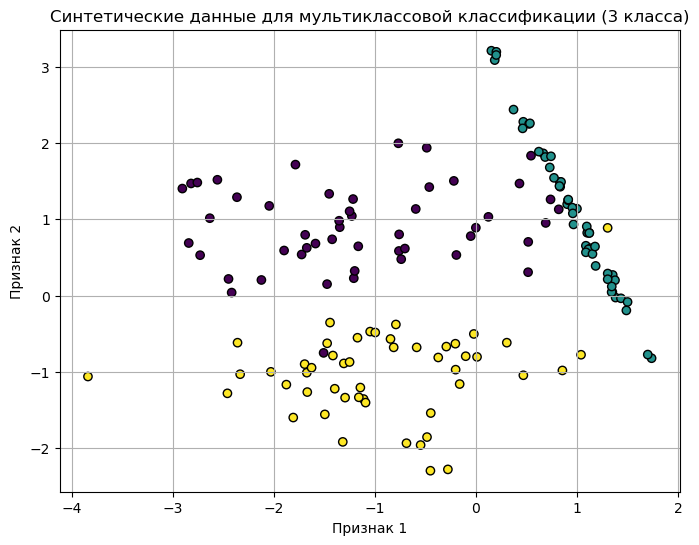

Матрица признаков X_multiclass (первые 5 строк):
 [[-0.76766432  1.99751378]
 [-2.36384549  1.29043561]
 [-1.8753112  -1.16745299]
 [-1.80711269 -1.59936094]
 [-0.76201081  0.58520133]]
Вектор целевой переменной y_multiclass (первые 5 элементов):
 [0 0 2 2 0]


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression # Для краткости переименуем
from sklearn.metrics import accuracy_score # Для оценки качества

# --- Генерируем синтетические данные для мультиклассовой классификации ---
num_samples_multiclass = 150 # Увеличим количество точек
num_features = 2 # Оставим 2 признака для визуализации (хотя decision boundary для мультикласса будет сложнее)
num_classes = 3 # Теперь 3 класса!
np.random.seed(42)

# Используем make_classification с n_classes=3
X_multiclass, y_multiclass = make_classification(n_samples=num_samples_multiclass,
                                                          n_features=num_features,
                                                          n_informative=2,
                                                          n_redundant=0,
                                                          n_classes=num_classes, # Указываем количество классов = 3
                                                          random_state=42,
                                                          n_clusters_per_class=1) # Упростим кластеры

# Визуализируем данные мультиклассовой классификации
plt.figure(figsize=(8, 6))
plt.scatter(X_multiclass[:, 0], X_multiclass[:, 1], c=y_multiclass, cmap=plt.cm.viridis, edgecolors='k') # cmap=plt.cm.viridis - другая цветовая карта для 3 классов
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Синтетические данные для мультиклассовой классификации (3 класса)")
plt.grid(True)
plt.show()

print("Матрица признаков X_multiclass (первые 5 строк):\n", X_multiclass[:5])
print("Вектор целевой переменной y_multiclass (первые 5 элементов):\n", y_multiclass[:5])

**Запусти этот код.**

**Что изменилось в коде:**

*   `num_classes = 3` - теперь мы задаем **3 класса** для генерации данных.
*   `cmap=plt.cm.viridis` - используем другую **цветовую карту `viridis`**, которая хорошо подходит для отображения 3 и более классов (лучше различаются цвета, чем в `RdBu` для двух классов).
*   `n_clusters_per_class=1` - немного упростили кластеры, чтобы разделение между классами было более выраженным.

**Что ты должен увидеть:**

*   **Точечный график с тремя классами данных,**  разными цветами (например, фиолетовые, желтые и зеленые точки).  Визуально должно быть видно, что данные разделены на 3 кластера.
*   Вывод матрицы `X_multiclass` и вектора `y_multiclass`.

**Получилось?  Видишь график с тремя классами?  Данные сгенерировались?**  Если да, то мы готовы к обучению модели мультиклассовой логистической регрессии! 😉🚀

**2. Обучение `LogisticRegression` для мультиклассовой классификации.**

Код для обучения `LogisticRegression` в `scikit-learn` **практически не отличается от бинарного случая!**  `scikit-learn` автоматически "понимает", что если классов больше двух, нужно обучать **мультиклассовую логистическую регрессию.**  По умолчанию, `LogisticRegression` использует стратегию **"one-vs-rest" (one-vs-all)** для мультиклассовой классификации, но можно также задать стратегию **"multinomial"**, которая использует **Softmax и Категориальную кросс-энтропию** (как мы и обсуждали).

**Давай обучим `LogisticRegression` с настройкой `multi_class='multinomial'` (чтобы явно использовать Softmax) и `solver='lbfgs'` (это один из оптимизаторов, который хорошо работает с multinomial Logistic Regression).**

In [76]:
# --- Обучение LogisticRegression для мультиклассовой классификации ---
model_sklearn_multiclass = SklearnLogisticRegression(multi_class='multinomial', solver='lbfgs') # Указываем multi_class='multinomial' и solver='lbfgs'
model_sklearn_multiclass.fit(X_multiclass, y_multiclass) # Обучаем модель на мультиклассовых данных

# --- Получение параметров модели ---
sklearn_w_multiclass = model_sklearn_multiclass.coef_ # Веса
sklearn_b_multiclass = model_sklearn_multiclass.intercept_ # Смещения

print("\nПараметры LogisticRegression для мультиклассовой классификации:")
print(f"  w (веса признаков):\n{sklearn_w_multiclass}") # Выводим матрицу весов целиком
print(f"  b (смещения): {sklearn_b_multiclass}") # Выводим вектор смещений


Параметры LogisticRegression для мультиклассовой классификации:
  w (веса признаков):
[[-1.33470802  0.84553832]
 [ 2.27041004  1.55054205]
 [-0.93570202 -2.39608037]]
  b (смещения): [ 0.65793436 -1.33172953  0.67379517]


c:\ProgramData\anaconda3\envs\konspect\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**Запусти этот код.**

**Что делает этот код:**

*   Создает объект `model_sklearn_multiclass = SklearnLogisticRegression(multi_class='multinomial', solver='lbfgs')`.  **Важные параметры:**
    *   `multi_class='multinomial'` - указывает `scikit-learn` использовать **Softmax и Категориальную кросс-энтропию** для мультиклассовой классификации.
    *   `solver='lbfgs'` - выбирает **алгоритм оптимизации `lbfgs`**, который хорошо подходит для `multinomial` Logistic Regression.  (Другие варианты - `'newton-cg'`, `'sag'`, `'saga'`, `'liblinear'`, но `'lbfgs'` часто является хорошим выбором по умолчанию для небольших и средних датасетов).
*   Обучает модель `model_sklearn_multiclass.fit(X_multiclass, y_multiclass)` на наших мультиклассовых данных.
*   Получает параметры обученной модели: `sklearn_w_multiclass = model_sklearn_multiclass.coef_` и `sklearn_b_multiclass = model_sklearn_multiclass.intercept_`.
*   Выводит параметры модели на экран.

**Что ты должен увидеть в выводе:**

*   **Параметры `LogisticRegression` для мультиклассовой классификации.**
    *   **`w (веса признаков)` будет теперь *матрицей* размера `(num_classes, num_features)` = (3, 2) в нашем примере.**  Каждая **строка** матрицы `sklearn_w_multiclass` соответствует **одному классу**, и содержит **вектор весов `w_k` для этого класса.**  **Количество строк матрицы `w` равно количеству классов.**
    *   **`b (смещения)` будет теперь *вектором* размера `(num_classes,)` = (3,) в нашем примере.**  Каждый элемент вектора `sklearn_b_multiclass` соответствует **смещению `b_k` для соответствующего класса.**  **Количество элементов вектора `b` равно количеству классов.**

**Как интерпретировать параметры мультиклассовой логистической регрессии?**

*   Теперь у нас **не один вектор весов `w` и одно смещение `b`, а *несколько* векторов весов `w_k` и смещений `b_k`, по одному на каждый класс `k`.**
*   Для каждого класса `k` модель как бы учится **"отделять" этот класс от *всех остальных классов*.**  Веса `w_k` и смещение `b_k` определяют **линейную функцию `z_k = Xw_k + b_k`**, которая вычисляет "скор" для класса `k`.  Чем больше скор `z_k`, тем выше вероятность принадлежности к классу `k` (после применения Softmax).

**У тебя получилось обучить модель мультиклассовой логистической регрессии и увидеть параметры `w` и `b`?  Понятно ли, почему `w` теперь - матрица, а `b` - вектор?**  Или есть вопросы?  Не стесняйся спрашивать! 😉  Дальше мы посмотрим, как делать предсказания и оценивать качество модели мультиклассовой классификации! 🚀

🚀  Теперь, когда модель мультиклассовой логистической регрессии обучена, давай посмотрим, **как делать предсказания и оценивать ее качество!**

**3. Предсказание классов и вероятностей в мультиклассовой логистической регрессии.**

**Добавь в Jupyter Notebook следующий код:**


In [77]:
# --- 3. Предсказание классов и вероятностей ---

# a) Предсказание вероятностей классов (вероятность для каждого класса для каждого объекта)
y_predicted_proba_multiclass_sklearn = model_sklearn_multiclass.predict_proba(X_multiclass) # predict_proba() возвращает вероятности для всех классов

print("\n--- Предсказанные вероятности (первые 5 объектов) ---")
print(y_predicted_proba_multiclass_sklearn[:5]) # Выводим вероятности для первых 5 объектов

# b) Предсказание классов (выбор класса с наибольшей вероятностью)
y_train_predicted_class_multiclass_sklearn = model_sklearn_multiclass.predict(X_multiclass) # predict() возвращает сразу предсказанные классы

print("\n--- Предсказанные классы (первые 5 объектов) ---")
print(y_train_predicted_class_multiclass_sklearn[:5]) # Выводим предсказанные классы для первых 5 объектов


--- Предсказанные вероятности (первые 5 объектов) ---
[[9.64995132e-01 3.38924864e-02 1.11238149e-03]
 [9.93935893e-01 6.71939993e-05 5.99691282e-03]
 [4.51294340e-02 3.13882677e-06 9.54867427e-01]
 [1.12138209e-02 7.35524372e-07 9.88785444e-01]
 [8.88335713e-01 1.17648470e-02 9.98994404e-02]]

--- Предсказанные классы (первые 5 объектов) ---
[0 0 2 2 0]


**Запусти этот код.**

**Что делает этот код:**

*   **a) Предсказывает вероятности классов с помощью `model_sklearn_multiclass.predict_proba(X_multiclass)`.**  Функция `predict_proba()` возвращает **матрицу вероятностей размера `(num_samples_multiclass, num_classes)` = (150, 3) в нашем примере.**

    *   **Каждая строка матрицы** соответствует **одному объекту** из `X_multiclass`.
    *   **Каждый столбец матрицы** соответствует **одному классу.**
    *   **Значение на пересечении i-й строки и j-го столбца** - это **предсказанная вероятность принадлежности i-го объекта к j-му классу.**  Эти вероятности получены с помощью функции **Softmax.**
    *   **Сумма вероятностей в каждой строке (для каждого объекта) равна 1.**

    Код выводит вероятности для **первых 5 объектов.**  Посмотри на вывод.  Ты должен увидеть матрицу чисел, где каждая строка - это вероятности для одного объекта, и сумма чисел в каждой строке примерно равна 1.

*   **b) Предсказывает классы с помощью `model_sklearn_multiclass.predict(X_multiclass)`.**  Функция `predict()` возвращает **вектор предсказанных классов размера `(num_samples_multiclass,)` = (150,).**

    *   Для каждого объекта функция `predict()` выбирает **класс с наибольшей предсказанной вероятностью** (то есть, класс, для которого вероятность в матрице `predict_proba` максимальна в данной строке).
    *   Код выводит предсказанные классы для **первых 5 объектов.**  Посмотри на вывод.  Ты должен увидеть вектор целых чисел (0, 1 или 2 в нашем примере, так как у нас 3 класса).

**4. Оценка качества мультиклассовой классификации - Accuracy и Матрица ошибок (Confusion Matrix).**

Для оценки качества мультиклассовой классификации мы тоже можем использовать **Accuracy**, как и в бинарном случае.  Но для более детального анализа ошибок модели очень полезна **Матрица ошибок (Confusion Matrix).**


--- Accuracy на обучающей выборке (мультикласс) ---
Accuracy scikit-learn (мультикласс): 0.9400


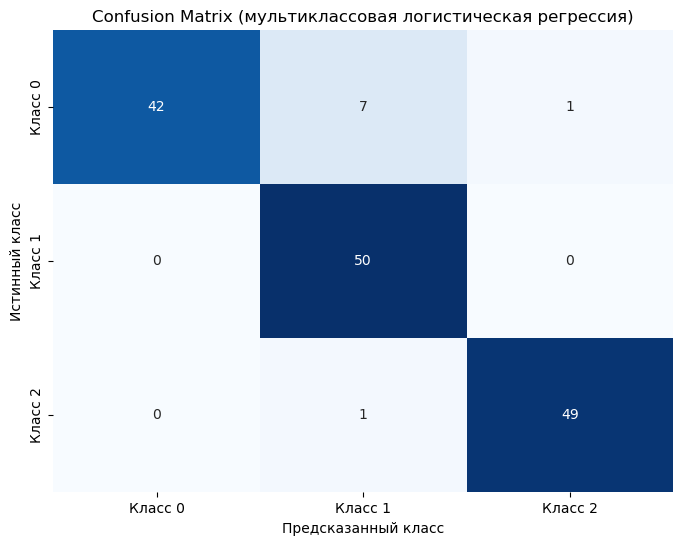

In [78]:
from sklearn.metrics import confusion_matrix # Импортируем функцию confusion_matrix
import seaborn as sns # Библиотека для красивой визуализации матрицы ошибок

# --- 4. Оценка качества - Accuracy и Confusion Matrix ---

# a) Вычисление Accuracy
y_train_predicted_class_multiclass_sklearn = model_sklearn_multiclass.predict(X_multiclass) # Предсказываем классы (если еще не предсказали)
accuracy_multiclass = accuracy_score(y_multiclass, y_train_predicted_class_multiclass_sklearn)

print(f"\n--- Accuracy на обучающей выборке (мультикласс) ---")
print(f"Accuracy scikit-learn (мультикласс): {accuracy_multiclass:.4f}") # Выводим Accuracy

# b) Вычисление и визуализация Confusion Matrix
cm_multiclass = confusion_matrix(y_multiclass, y_train_predicted_class_multiclass_sklearn) # Вычисляем Confusion Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm_multiclass, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=[f"Класс {i}" for i in range(num_classes)], # Подписи по оси x (предсказанные классы)
            yticklabels=[f"Класс {i}" for i in range(num_classes)]) # Подписи по оси y (истинные классы)
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Confusion Matrix (мультиклассовая логистическая регрессия)")
plt.show()